# Bank Churn 분석
- 이진분류 문제
- 데이터 탐색
- 데이터 전처리
- 분류 모델
- 분류 확률

# 데이터 탐색
## import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (4,4)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import itertools


In [3]:
!curl -L https://bit.ly/2MvLrmr -o bank.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   143  100   143    0     0    501      0 --:--:-- --:--:-- --:--:--   501
100   139    0   139    0     0    198      0 --:--:-- --:--:-- --:--:--     0
100   318  100   318    0     0    223      0  0:00:01  0:00:01 --:--:--   223
100  668k  100  668k    0     0   246k      0  0:00:02  0:00:02 --:--:--  620k


In [4]:
df_raw = pd.read_csv('bank.csv')
print(df_raw.shape)
df_raw[:5]

(10000, 14)


RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

- 특성
 - CreditScore : 신용점수
 - Tenure : 장기대출
 - Balance : 잔고
 - NumOfProducts : 은행 계좌 및 제휴 제품 수
 - HasCrCard : 은행 신용카드 보유 여부
 - IsActiveMember : 활성 고객 여부
 - EstimatedSalary : 예상 연봉
 
 
 - Exited : 이탈 여부

In [5]:
df = df_raw.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [8]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [9]:
df.describe(include=object)

Surname Geography Gender
count    10000     10000  10000
unique    2932         3      2
top      Smith    France   Male
freq        32      5014   5457

- RowNumber', 'CustomerId', 'Surname' 세개의 특성은 의미 없으므로 삭제

In [10]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], 1)

In [11]:
# 카테고리 변수의 모든 값 보기
for col in df.select_dtypes(include=object):
    print(col,":\n", df[col].unique())

Geography :
 ['France' 'Spain' 'Germany']
Gender :
 ['Female' 'Male']


In [12]:
# 카테고리형, 연속형 변수 (컬럼명) 나누기
category_cols = df.select_dtypes(include=object).columns.tolist()
continuous_cols = df.select_dtypes(include=[int, float]).columns.tolist()

category_cols, continuous_cols

(['Geography', 'Gender'],
 ['CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary',
  'Exited'])

In [13]:
# HasCrCard, IsActiveMember는 숫자지만 카테고리 변수이므로 위치를 바꾼다
category_cols.append('HasCrCard')
category_cols.append('IsActiveMember')
continuous_cols.remove('HasCrCard')
continuous_cols.remove('IsActiveMember')
# 확인하기
category_cols, continuous_cols

(['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'],
 ['CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'EstimatedSalary',
  'Exited'])

## 분포 보기
### 연속변수

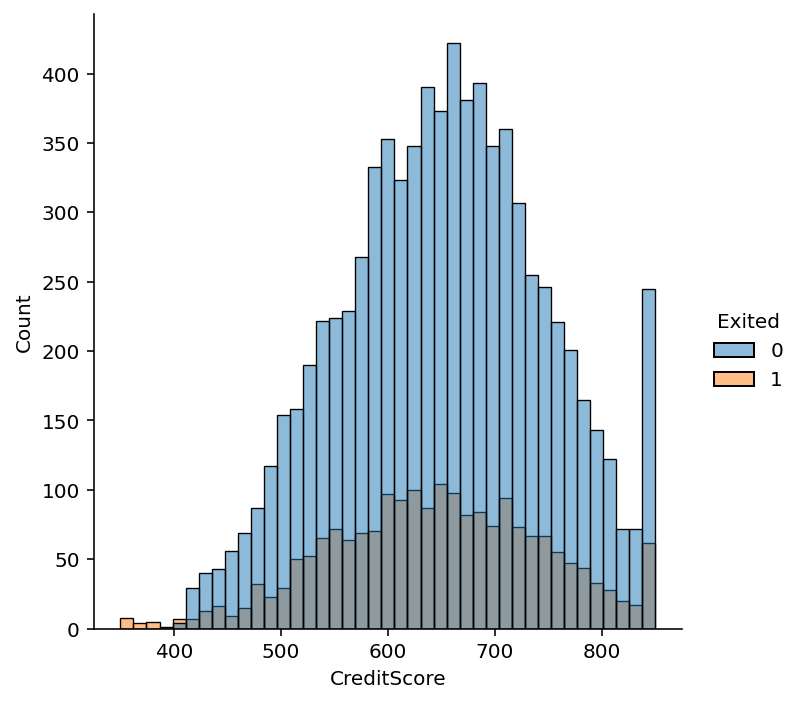

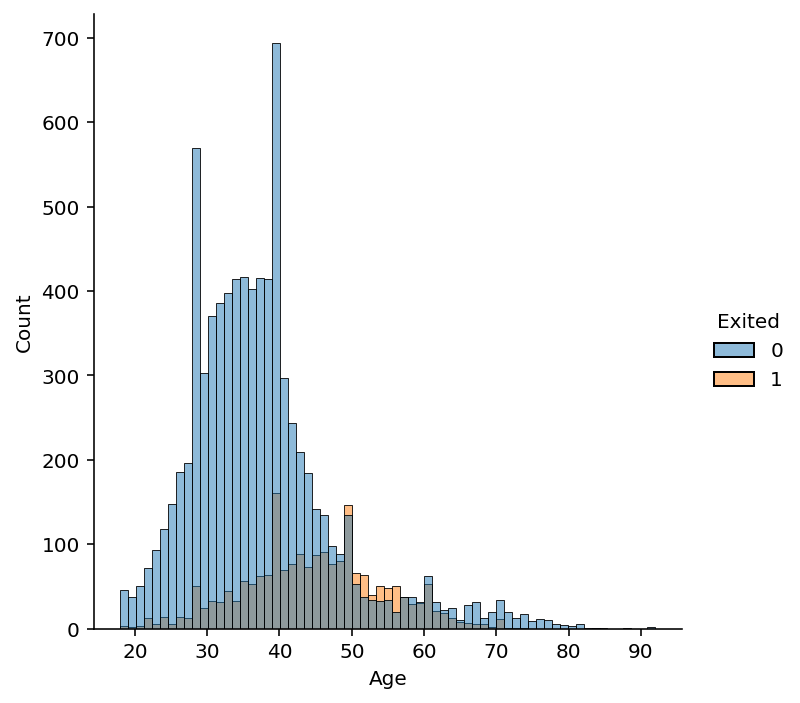

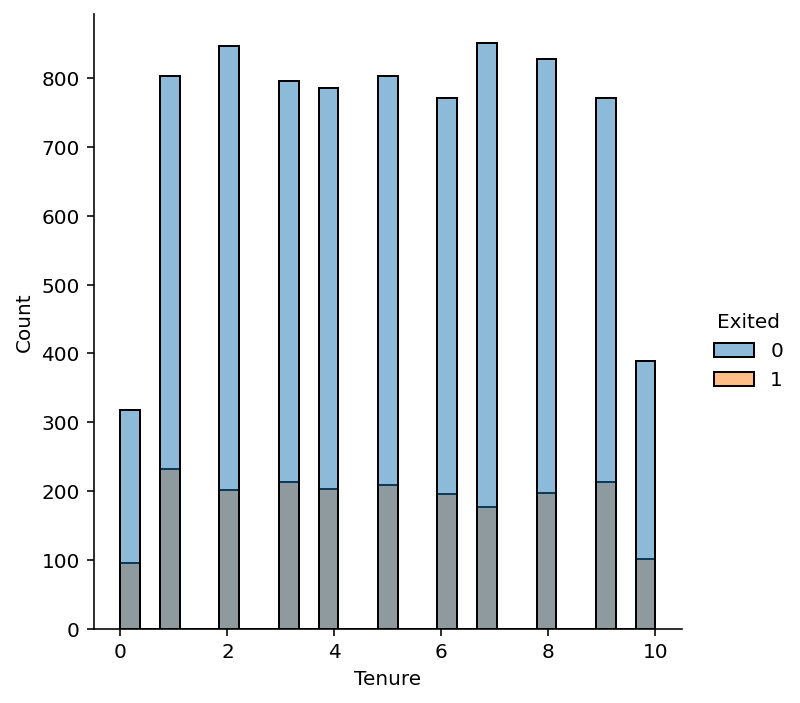

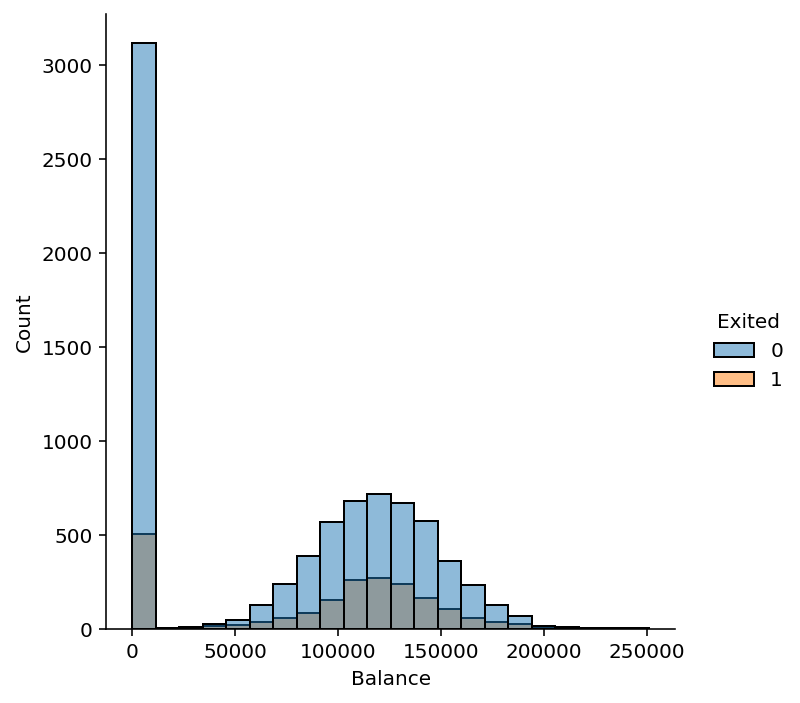

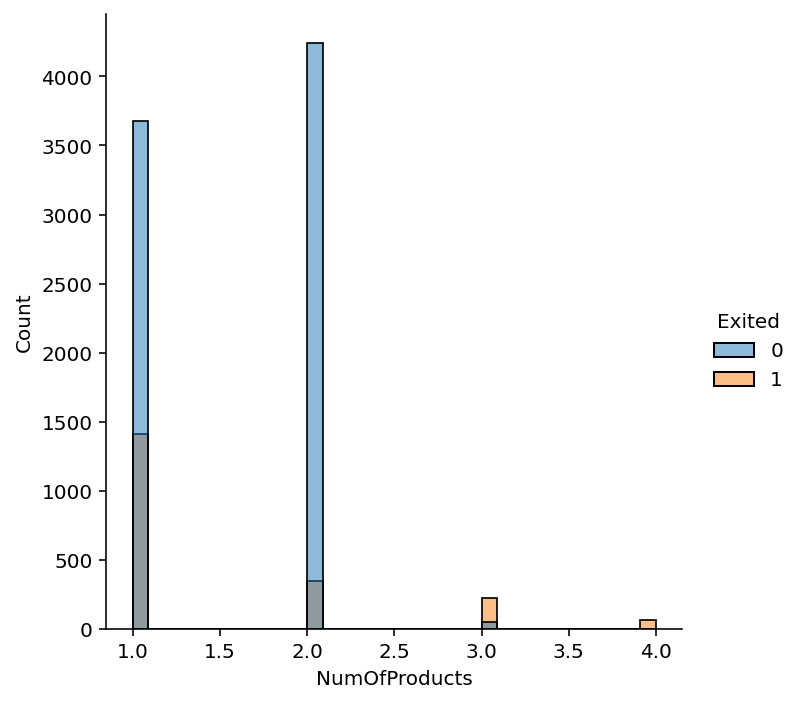

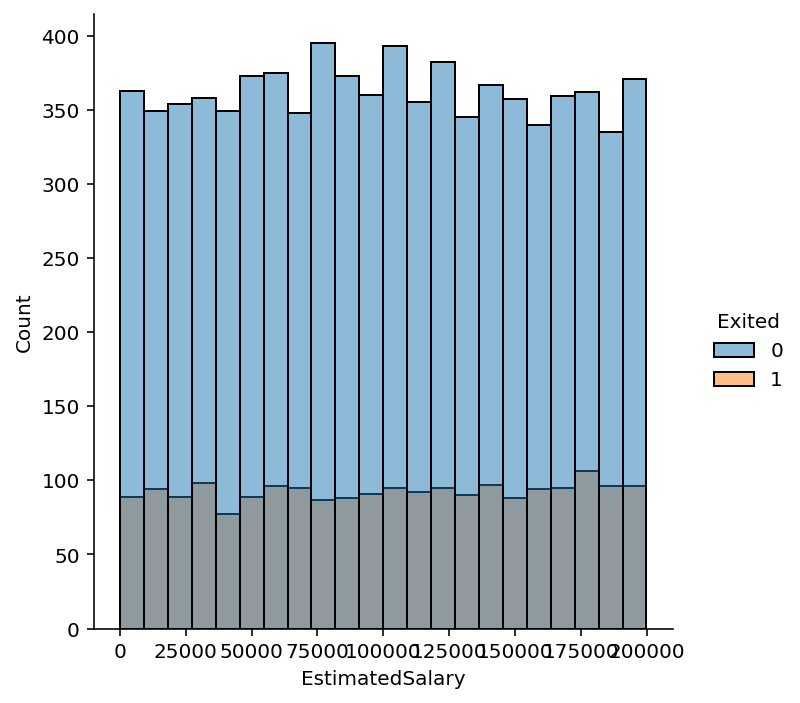

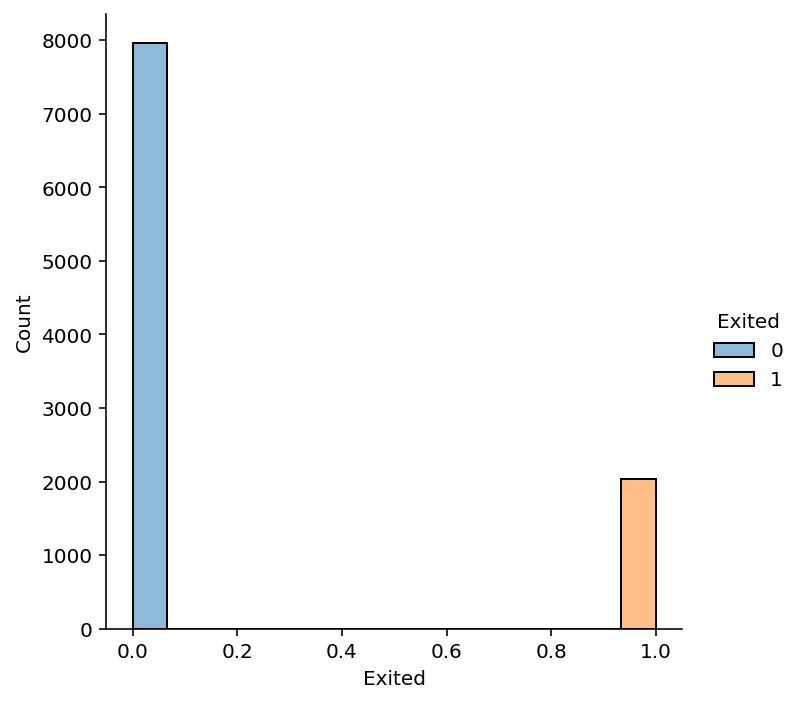

In [14]:
for col in continuous_cols:
    sns.displot(data=df, x=col, hue='Exited')

- 연속변수 별로 발생 빈도 보기
- sns.countplot() 사용

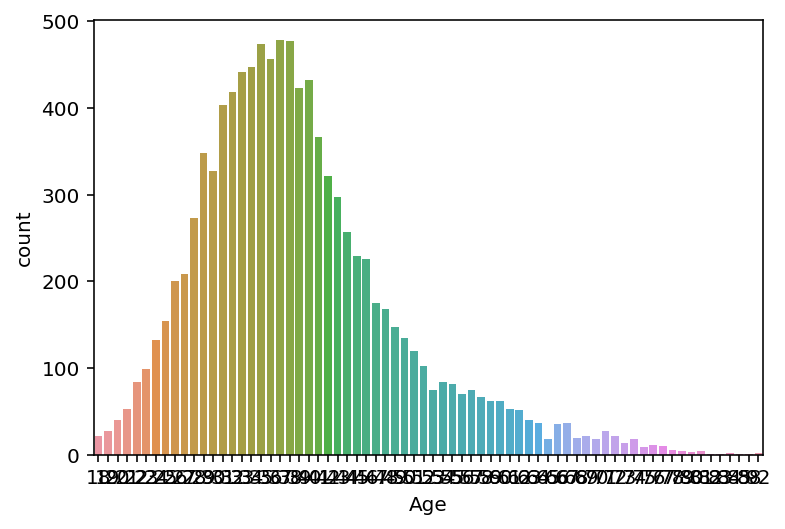

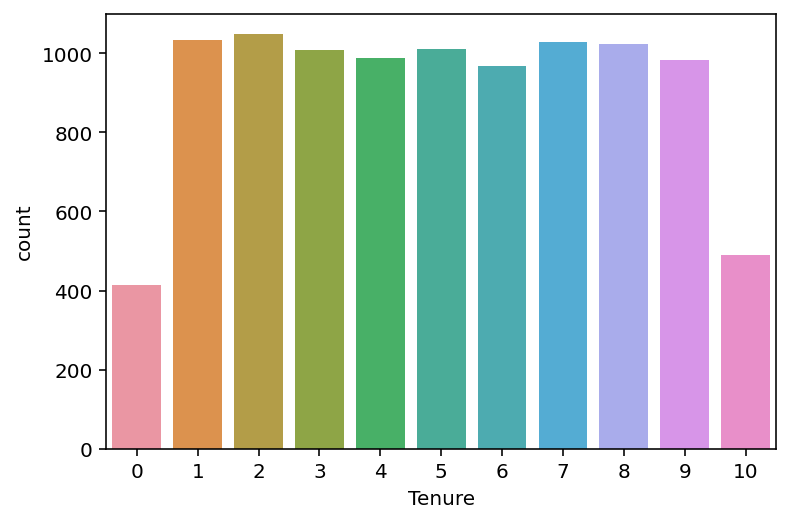

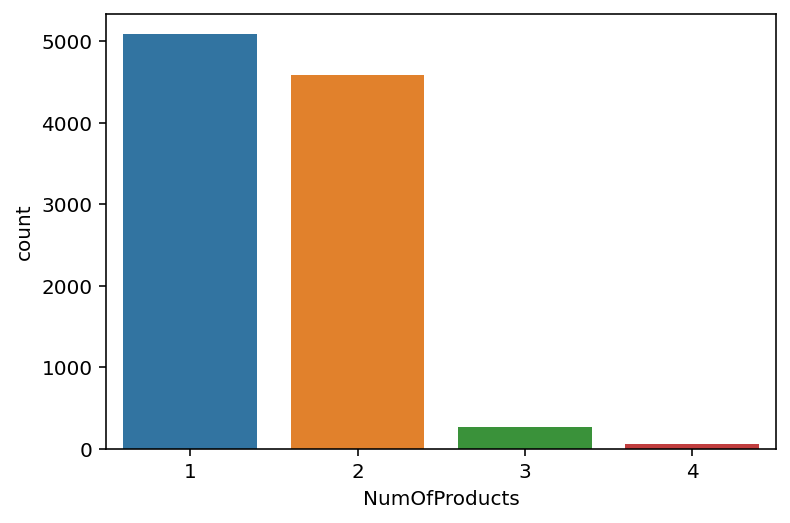

In [15]:
for col in ['Age', "Tenure", 'NumOfProducts']:
    sns.countplot(x=col, data=df)
    plt.show()

## (연습) Exited 로 나누어 카테고리별 총 수를 그리시오

In [75]:
# (풀이)



### 카테고리 변수 분포 보기

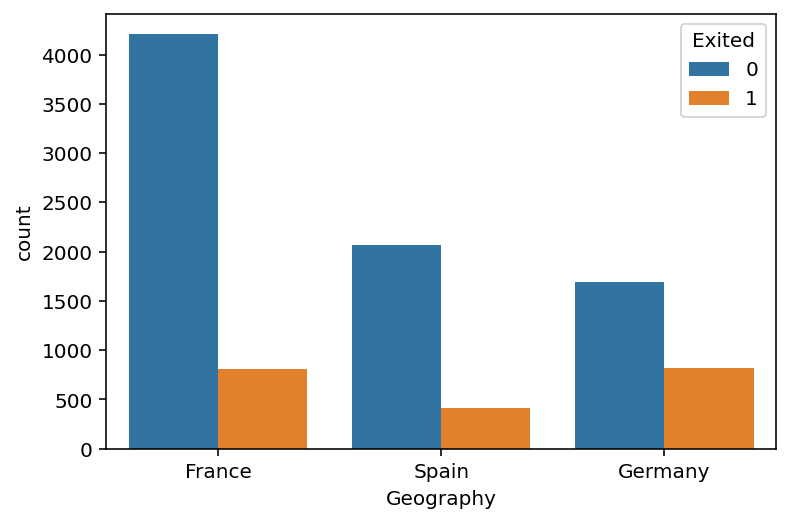

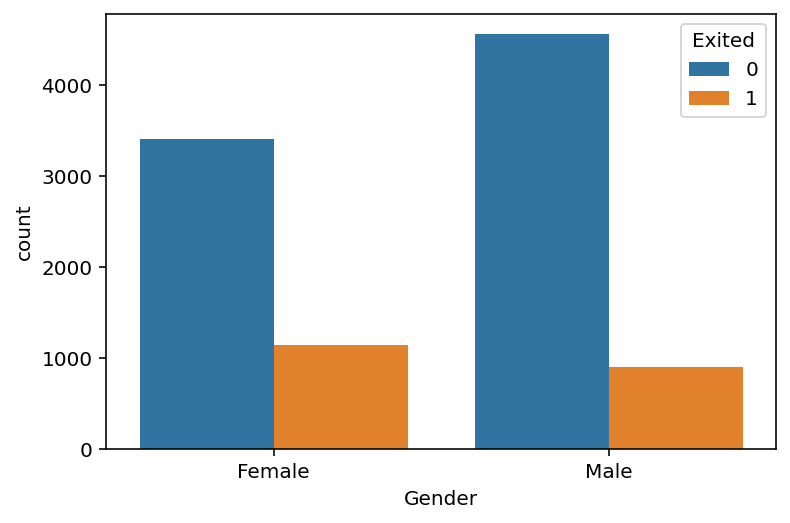

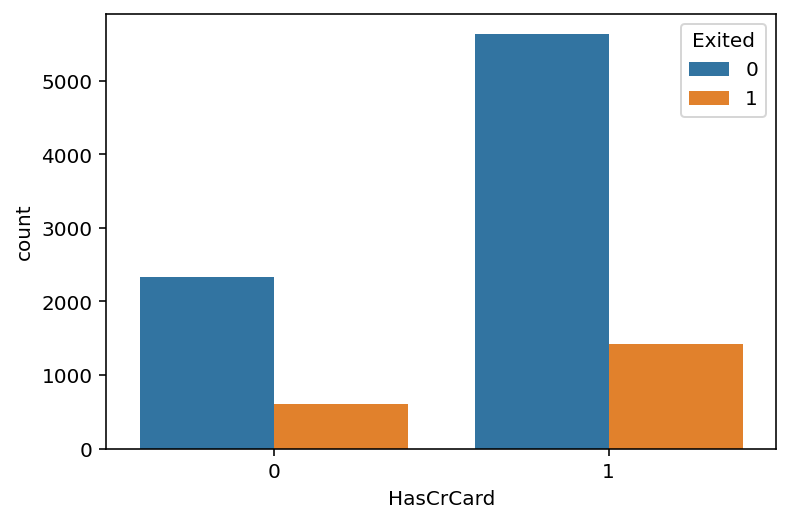

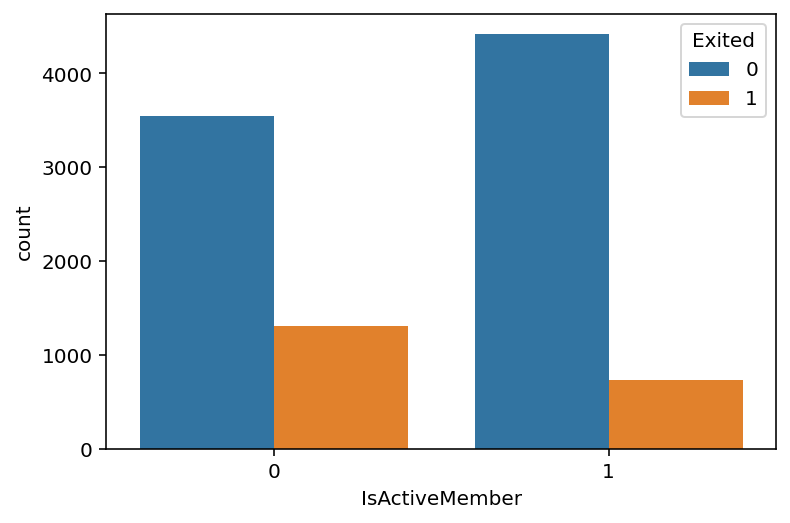

In [17]:
for col in category_cols:
    sns.countplot(x=col, data=df, hue='Exited')
    plt.show()

## 스캐터 플롯
- 두 연속 변수간의 관계 보기

In [18]:
# Exited 항목은 제외한 연속 변수 특성 (목적 변수임)
continuous_cols_e = continuous_cols.copy()
continuous_cols_e.remove('Exited')
continuous_cols_e

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

- 리스트 항목들의 조합(Combination) 구하기 $nCr$

In [19]:
scatter_list = list(itertools.combinations(continuous_cols_e, 2))
scatter_list

[('CreditScore', 'Age'),
 ('CreditScore', 'Tenure'),
 ('CreditScore', 'Balance'),
 ('CreditScore', 'NumOfProducts'),
 ('CreditScore', 'EstimatedSalary'),
 ('Age', 'Tenure'),
 ('Age', 'Balance'),
 ('Age', 'NumOfProducts'),
 ('Age', 'EstimatedSalary'),
 ('Tenure', 'Balance'),
 ('Tenure', 'NumOfProducts'),
 ('Tenure', 'EstimatedSalary'),
 ('Balance', 'NumOfProducts'),
 ('Balance', 'EstimatedSalary'),
 ('NumOfProducts', 'EstimatedSalary')]

- 모든 항목별 pair에 대해서 산포도 그리기

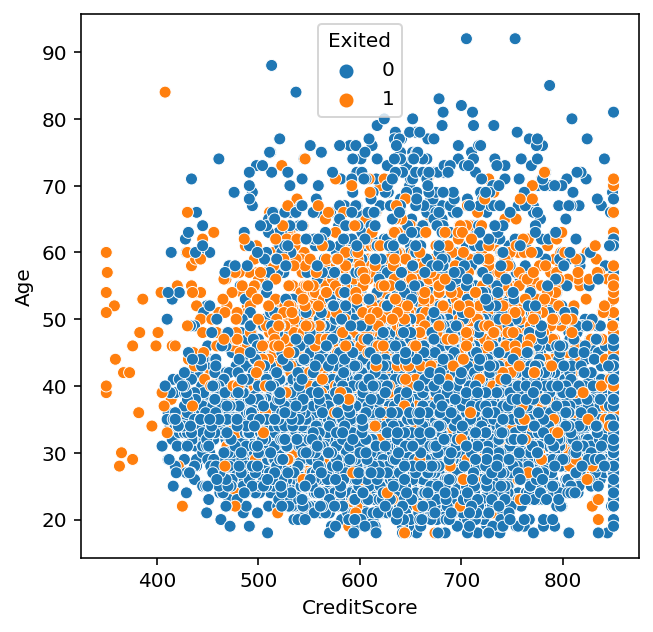

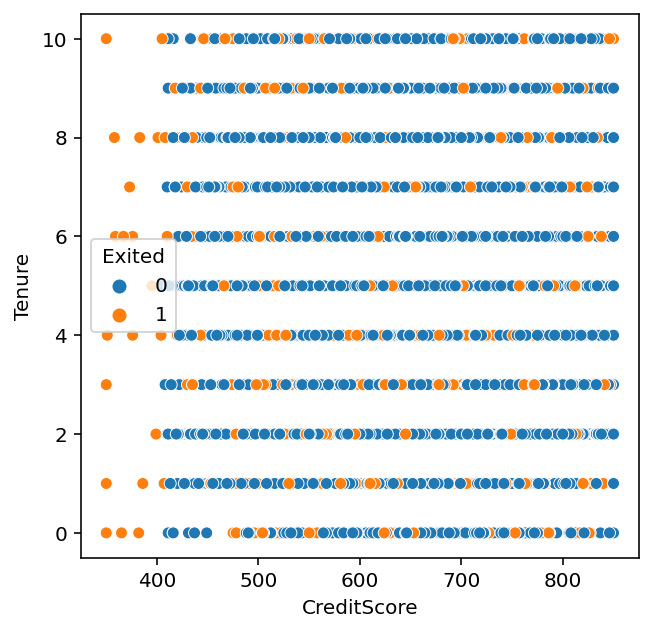

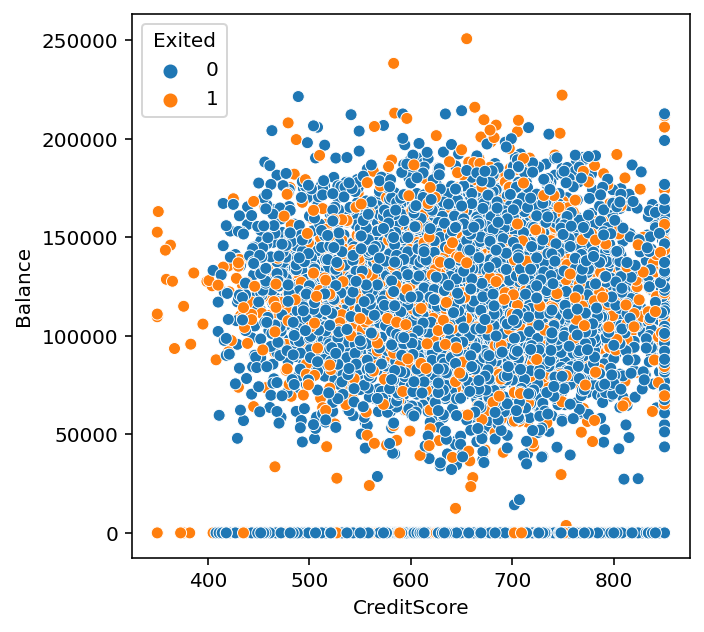

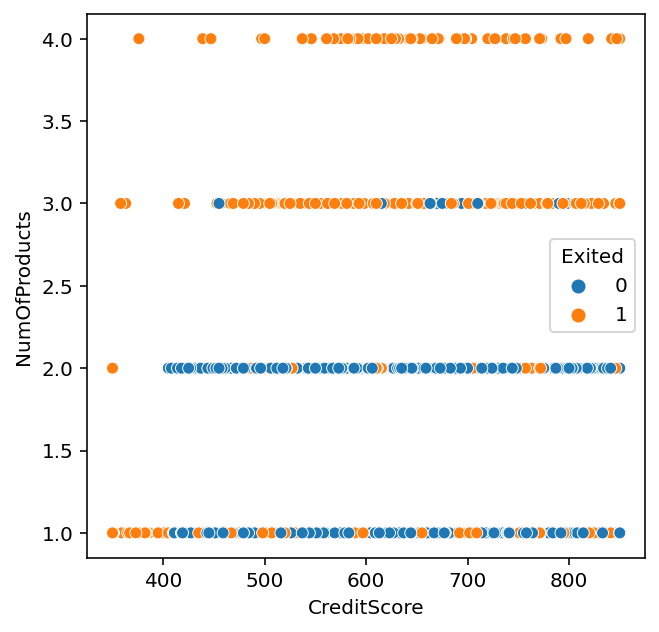

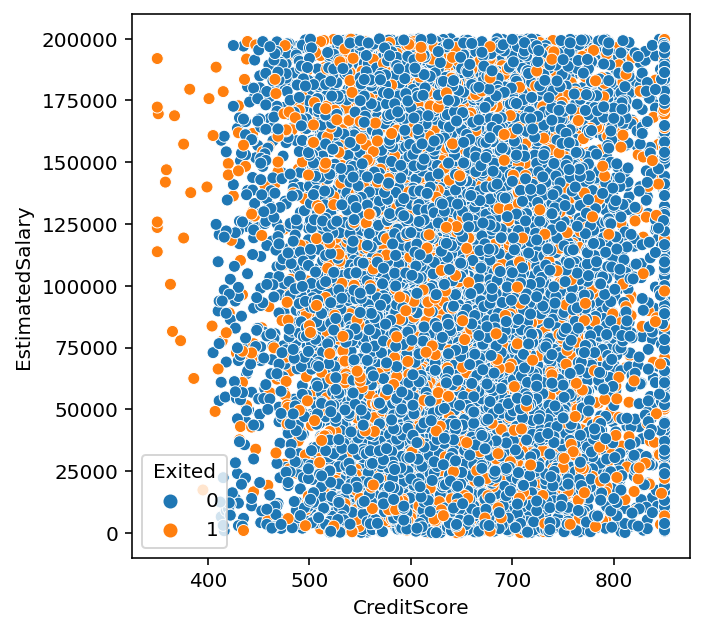

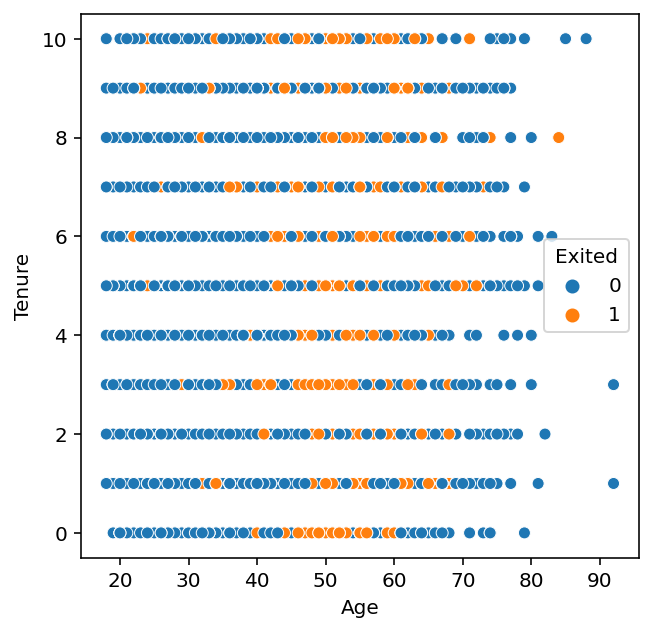

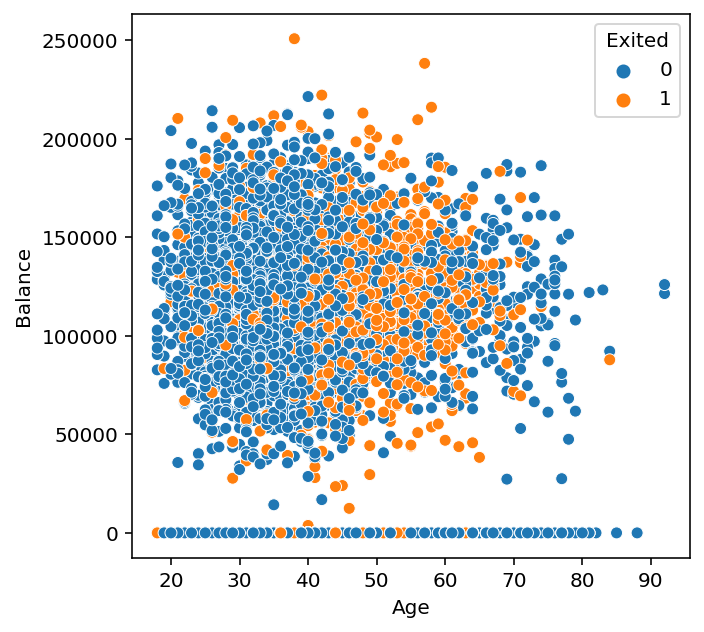

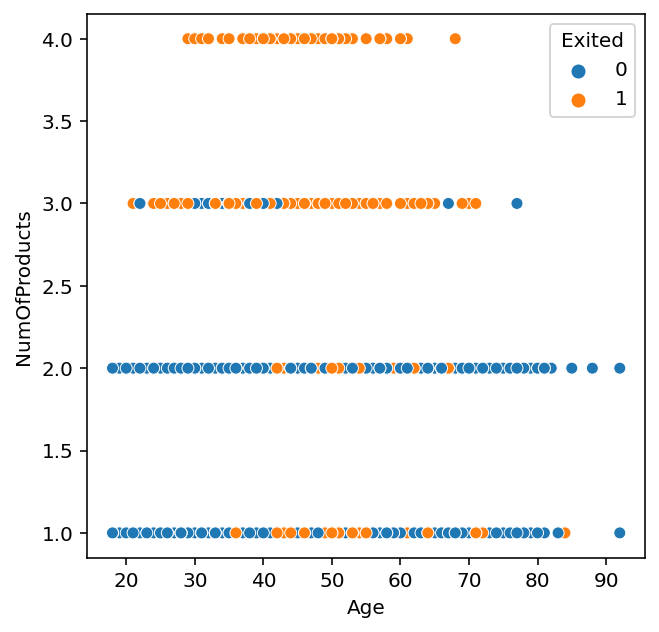

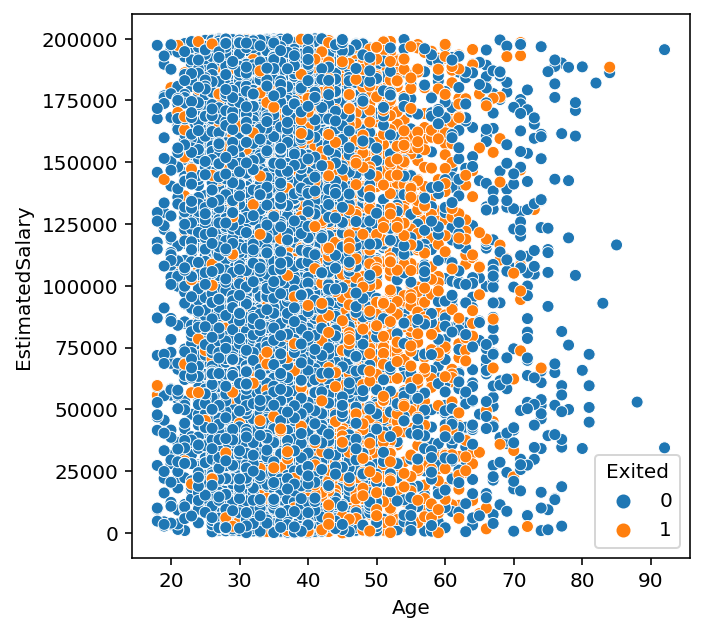

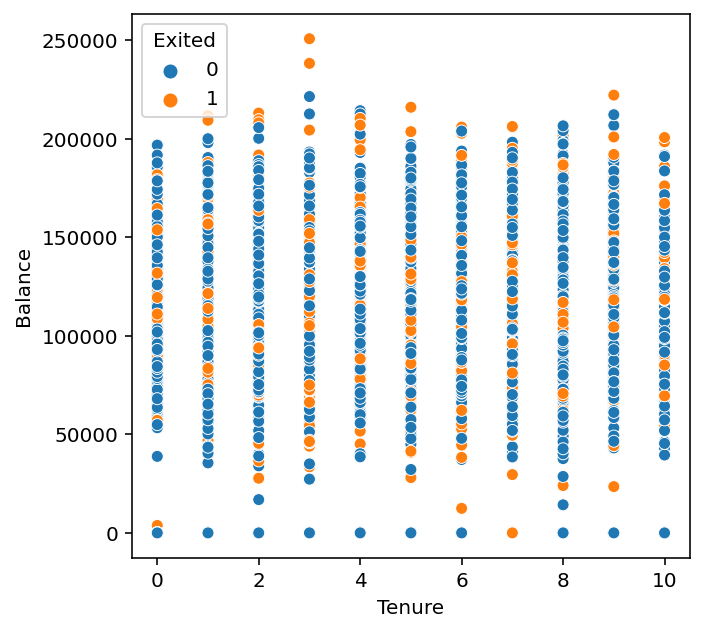

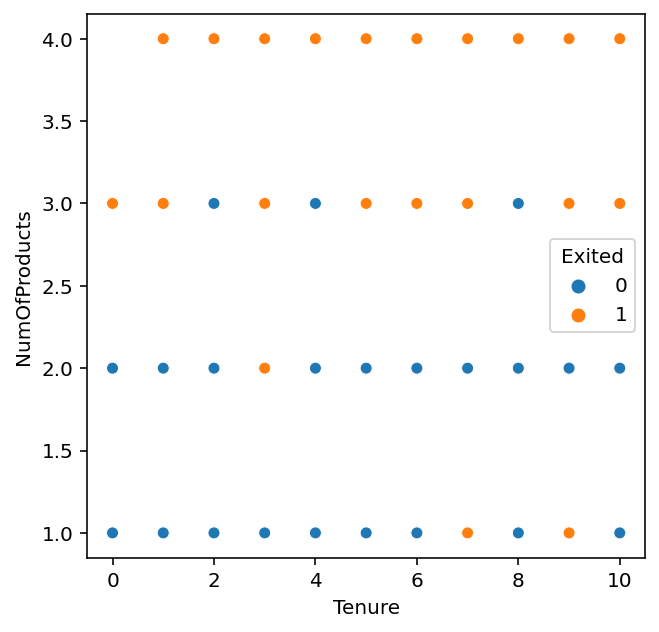

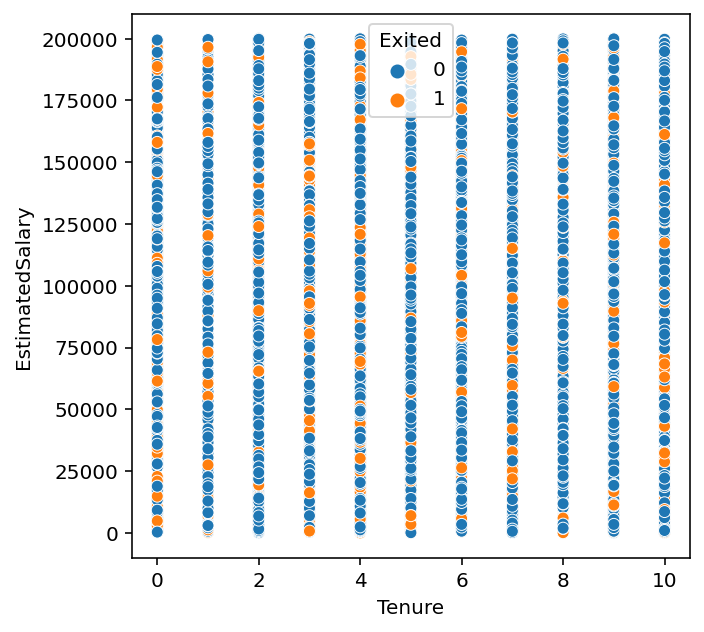

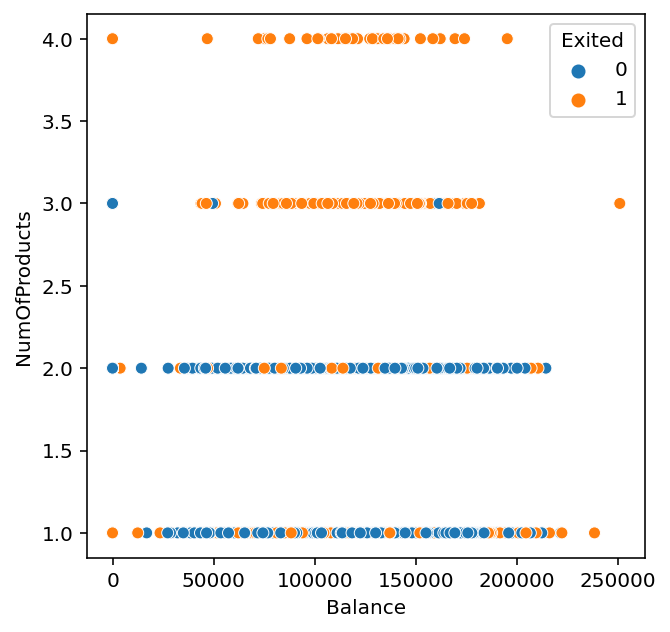

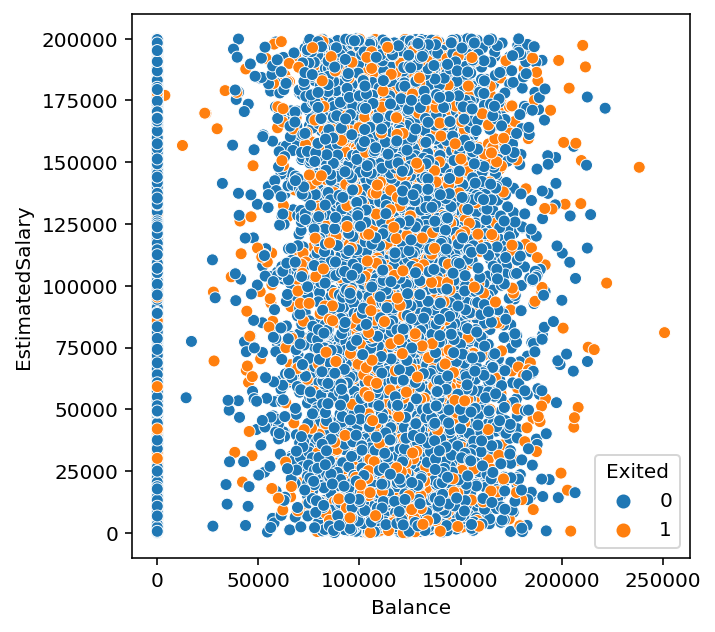

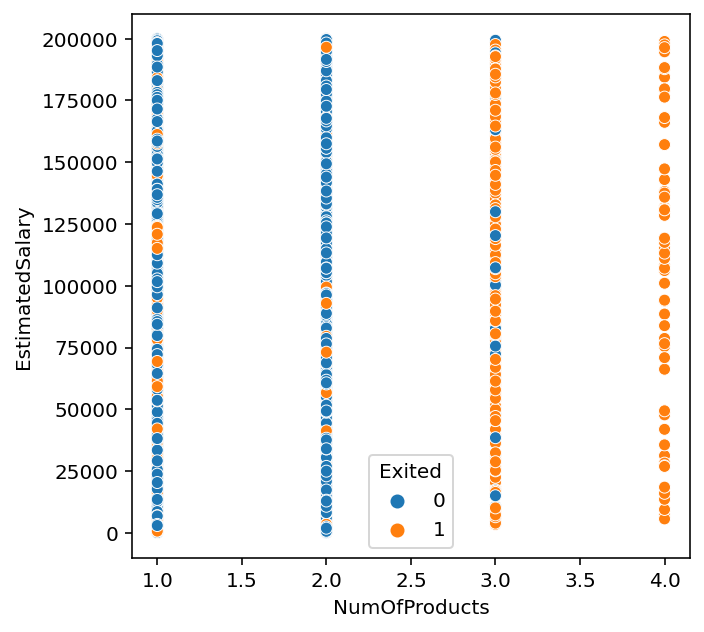

In [20]:
for pair in scatter_list:
    plt.figure(figsize=(5,5))
    sns.scatterplot(data=df, x=pair[0],y=pair[1],hue='Exited')
    plt.show()

## (연습) 주요 연속 변수간의 산포도 그리기
- 예: 'CreditScore', 'Age', 'Balance','EstimatedSalary' 4개 변수간의 산포도 6개만 그려보시오

In [76]:
# (풀이)



## 박스 플롯
- 각 연속변수의 범위를 각 카테고리별로 박스플롯으로 그린다
- Exited 를 구분해서 본다

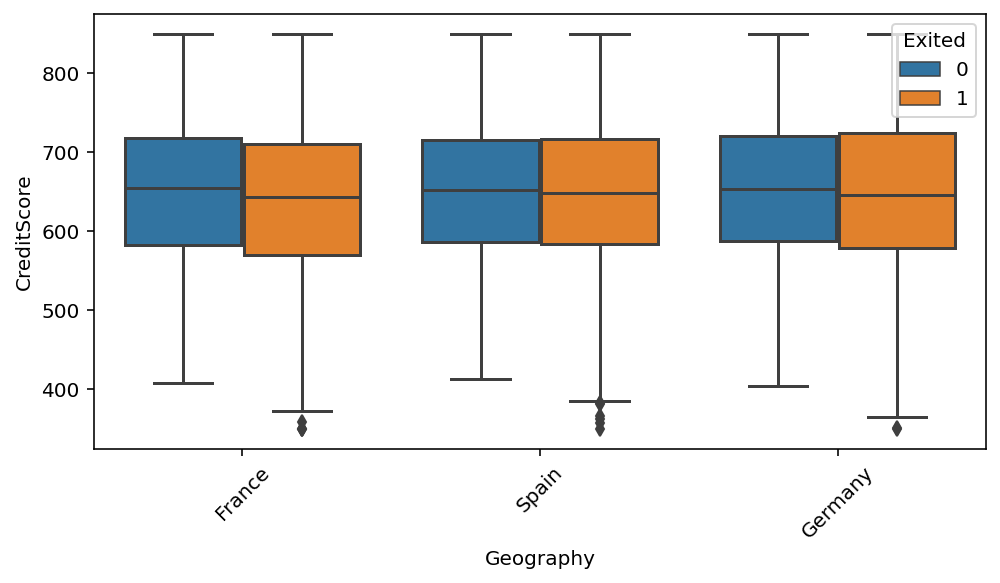

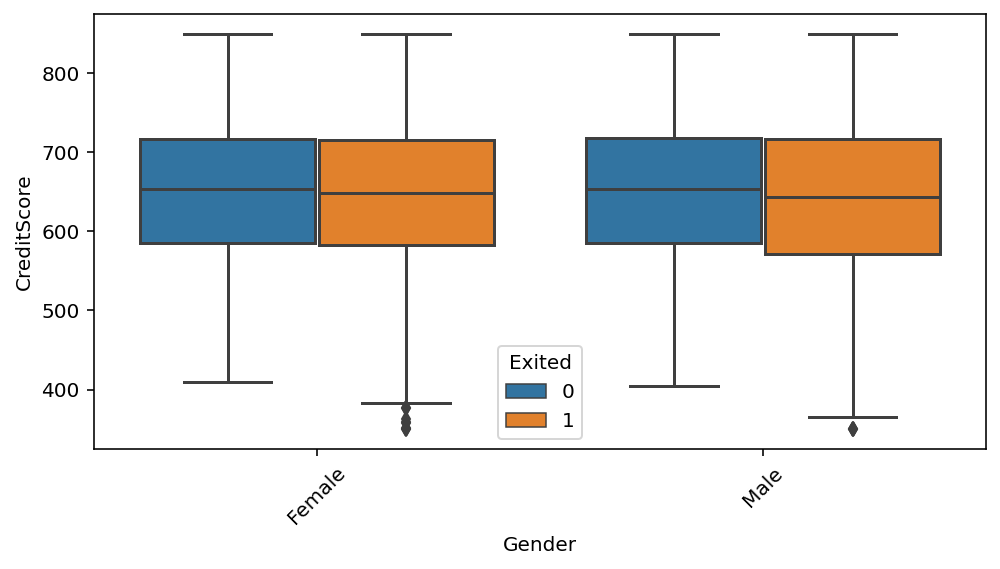

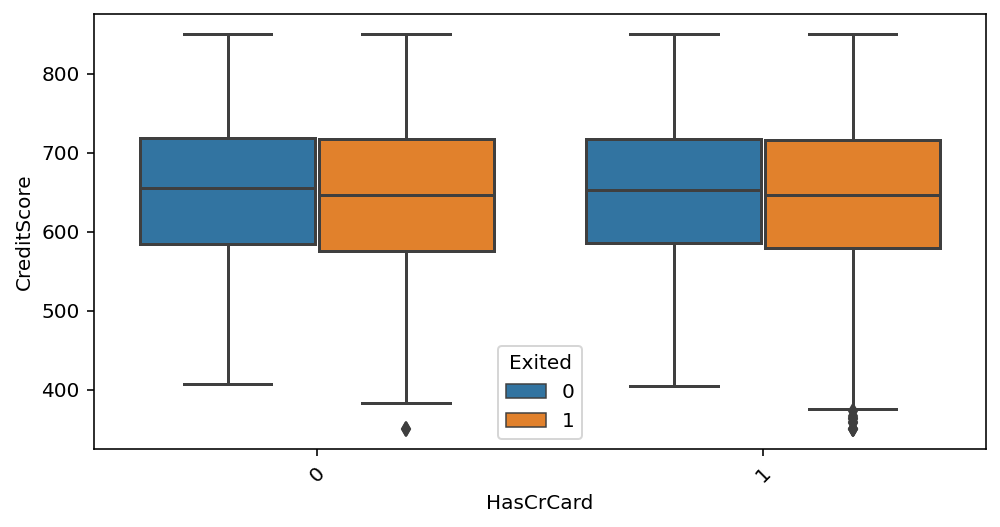

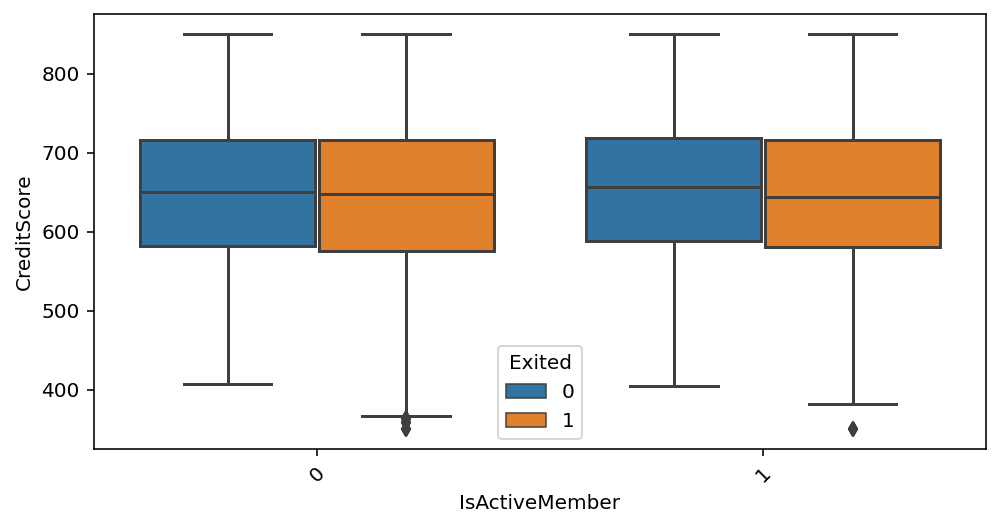

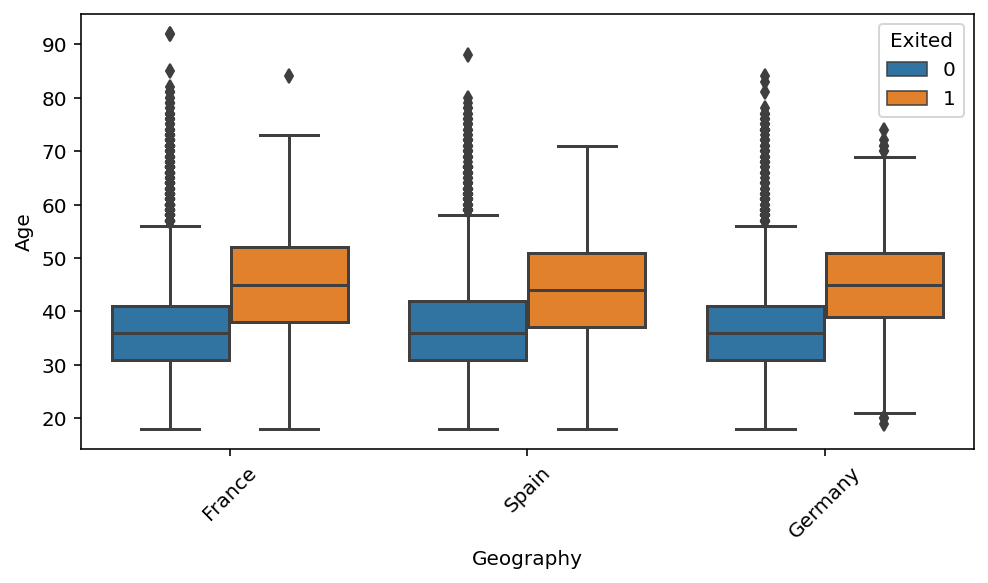

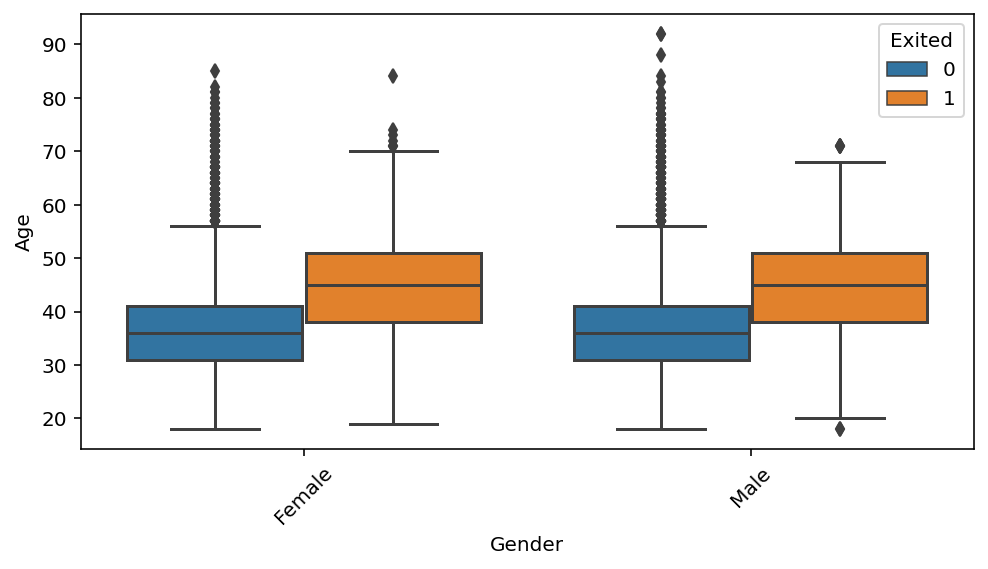

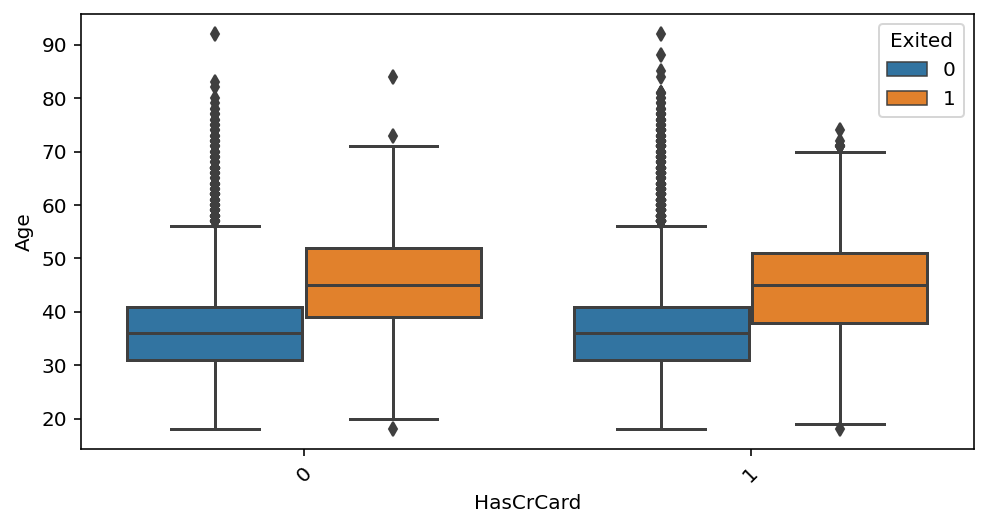

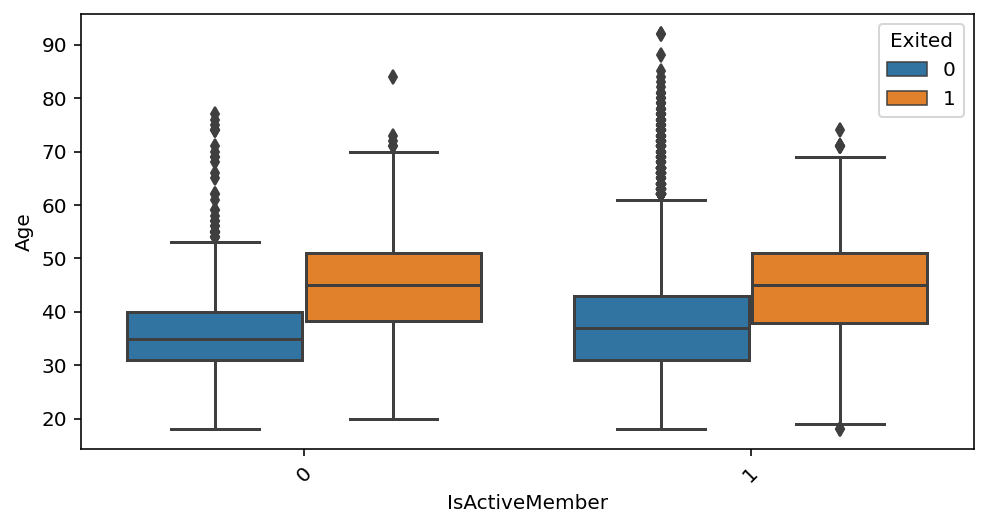

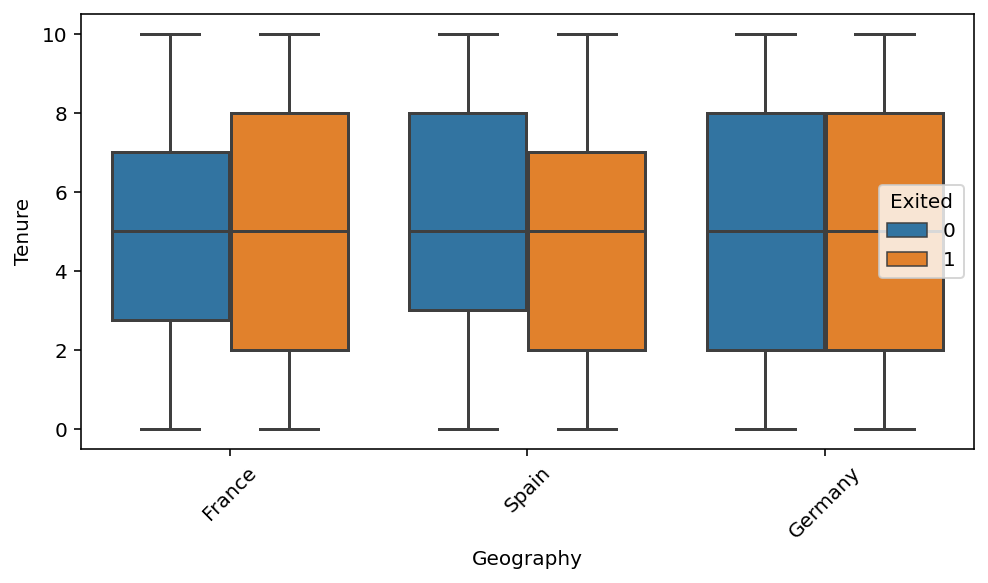

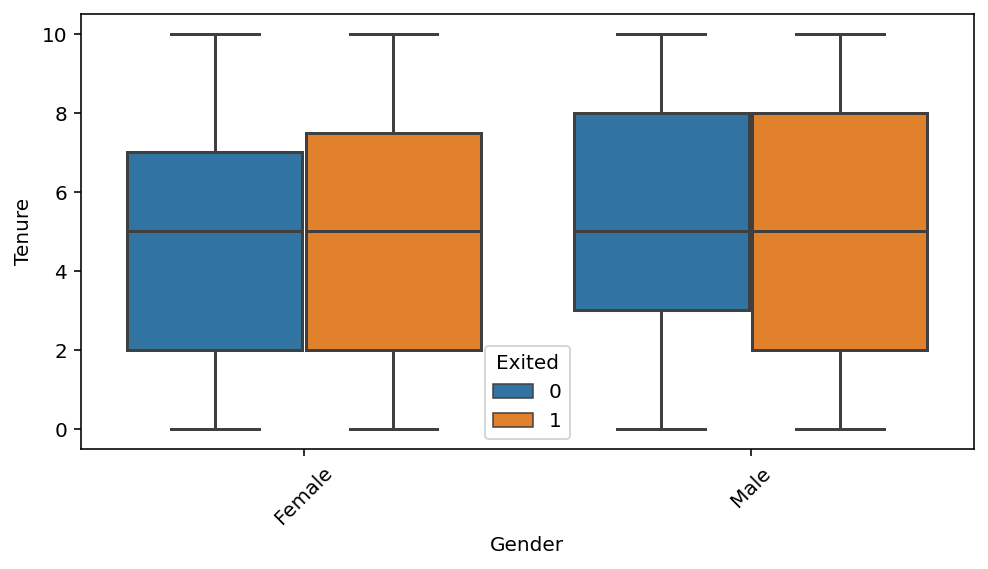

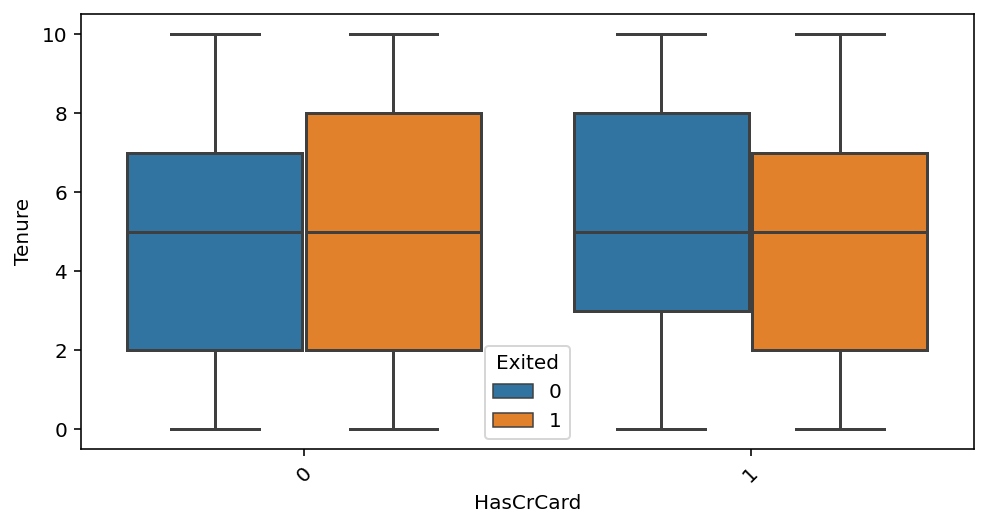

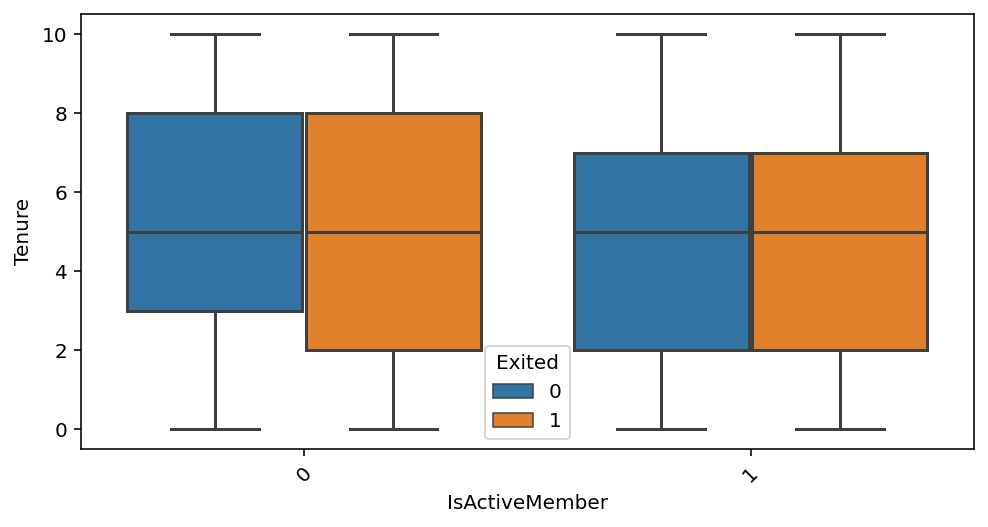

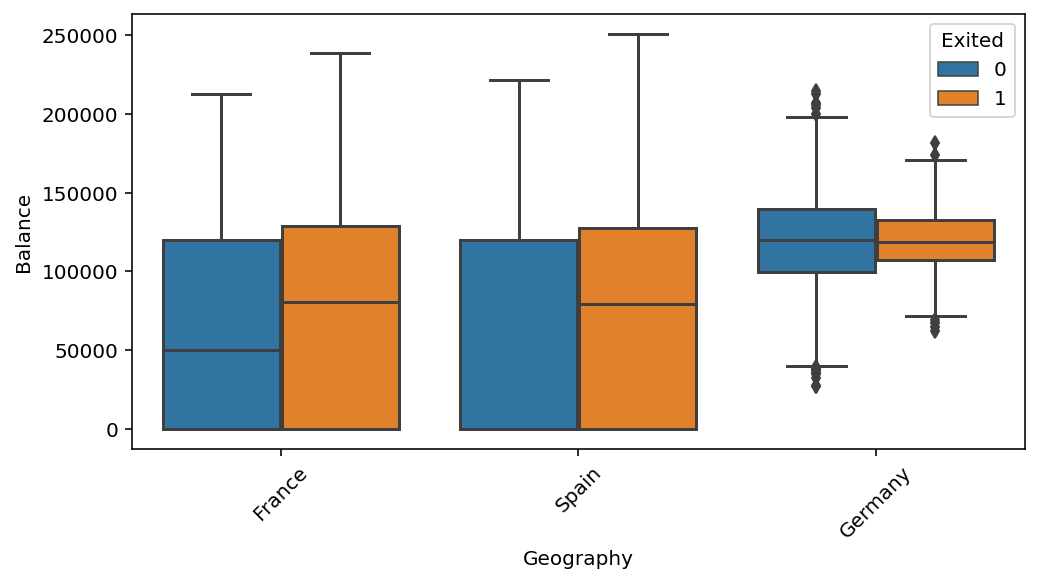

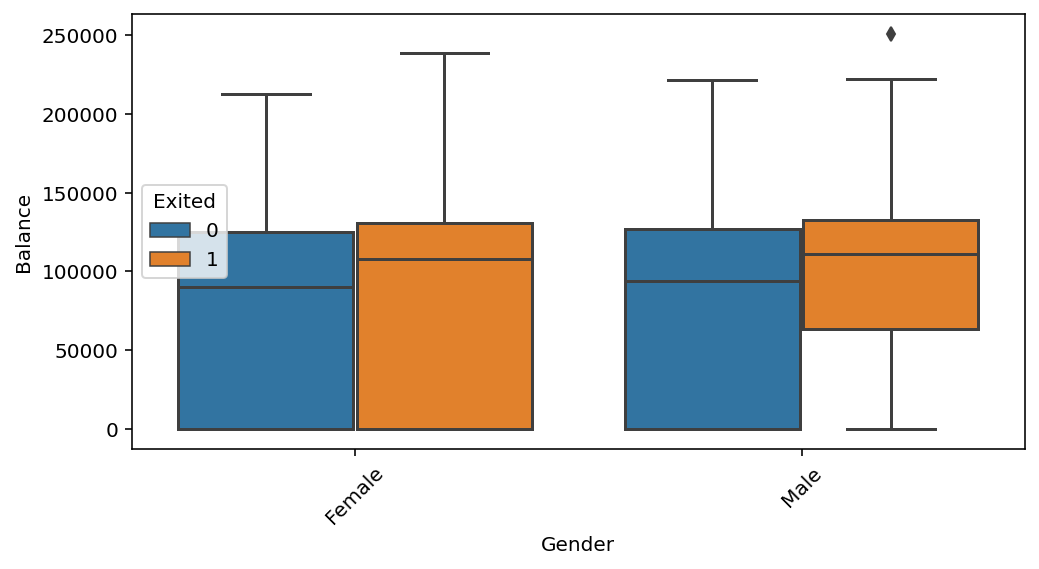

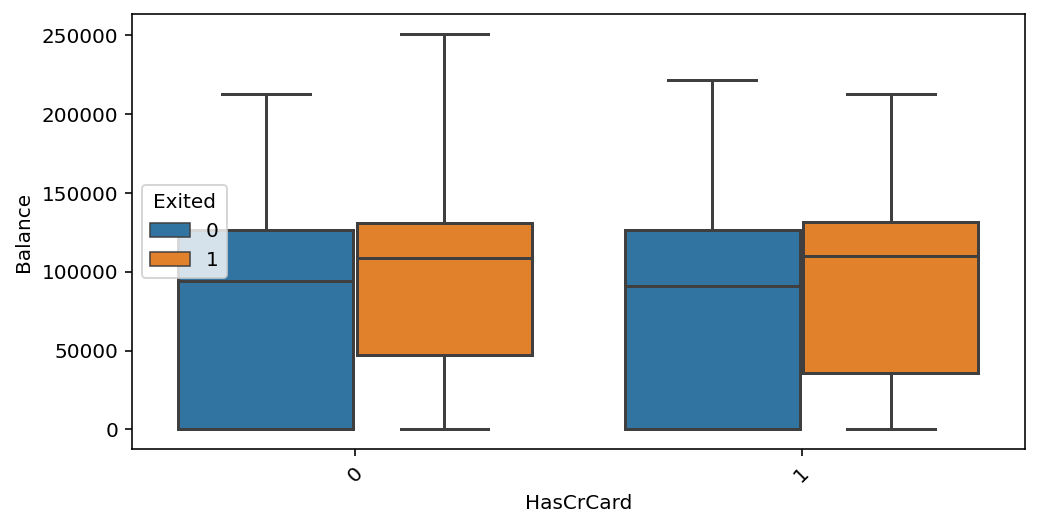

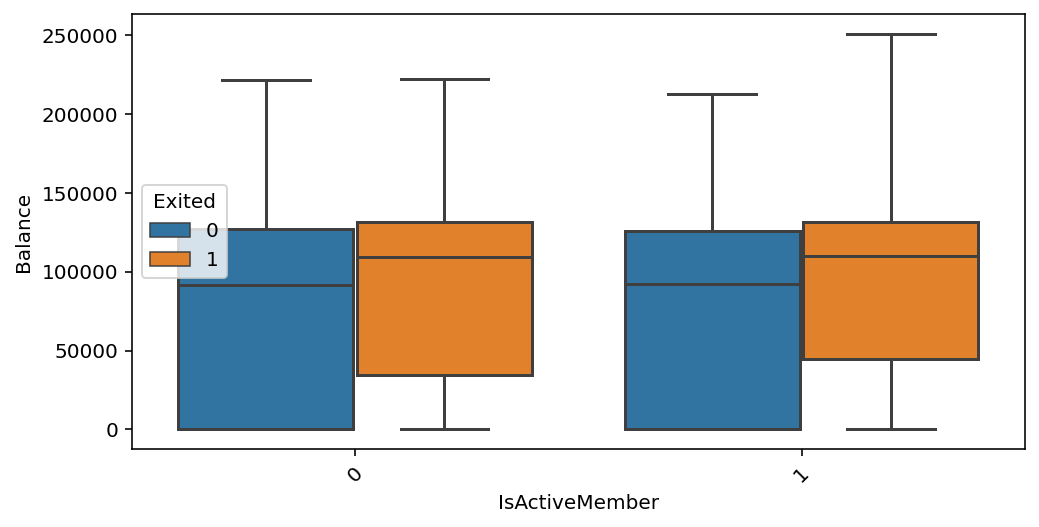

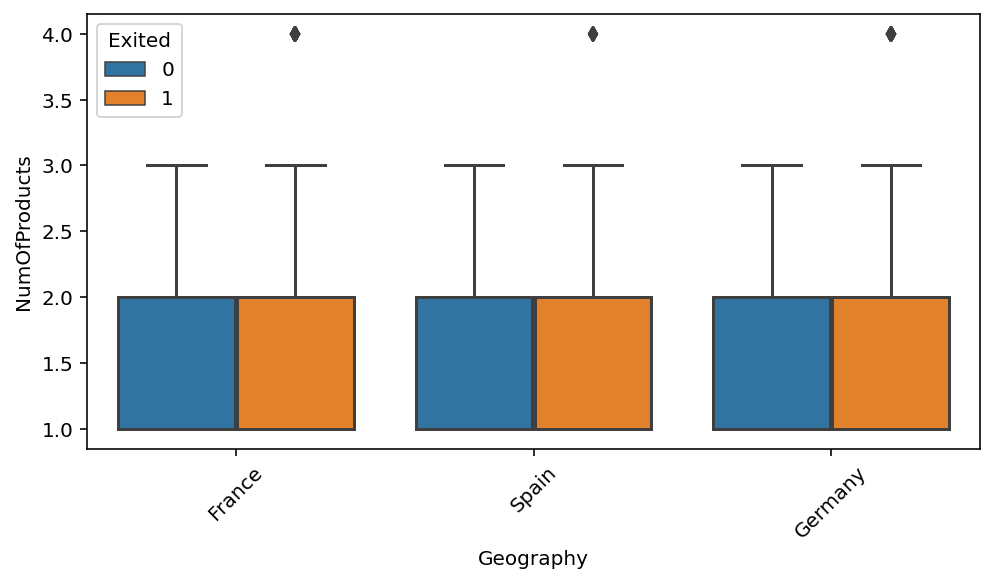

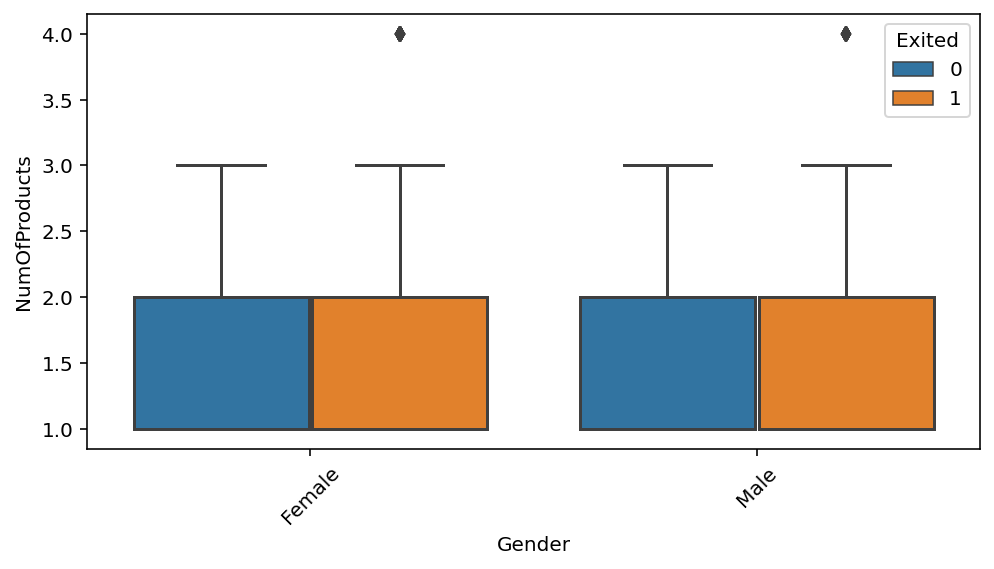

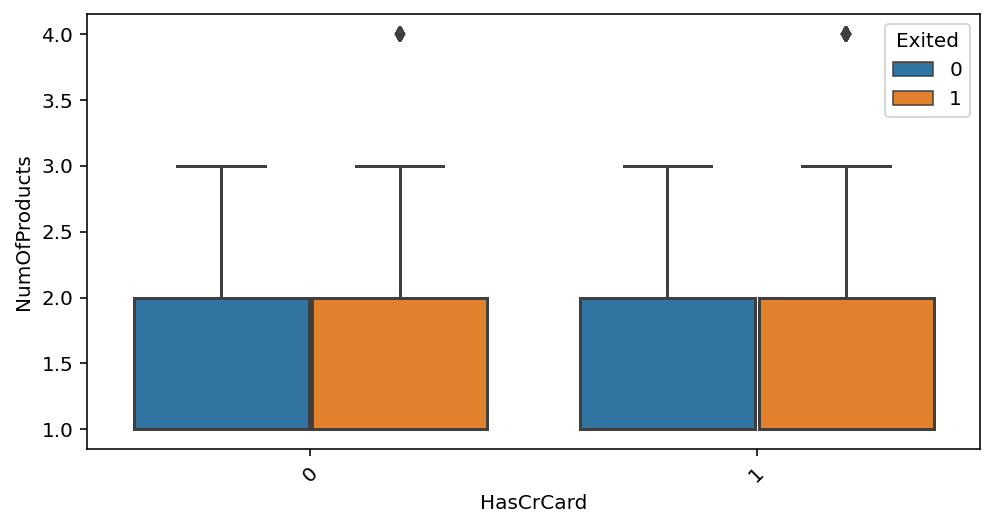

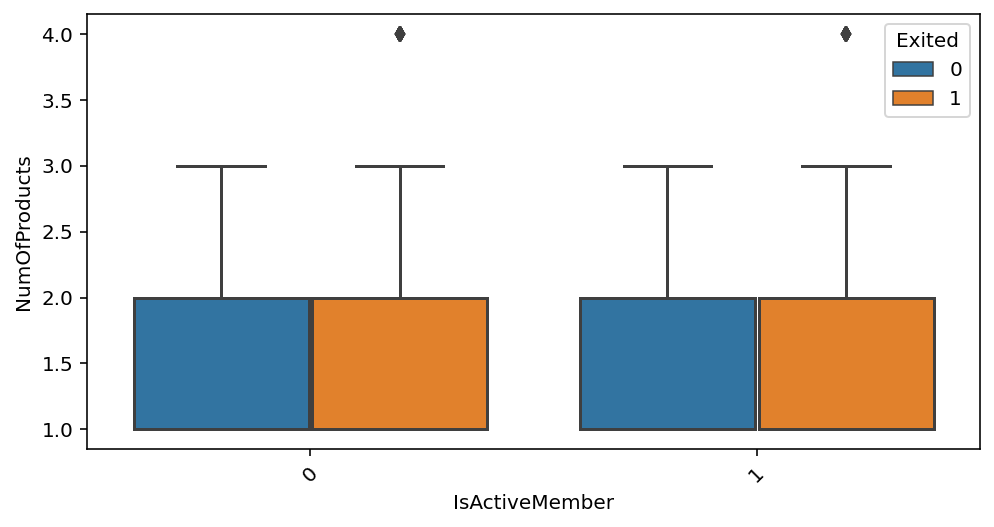

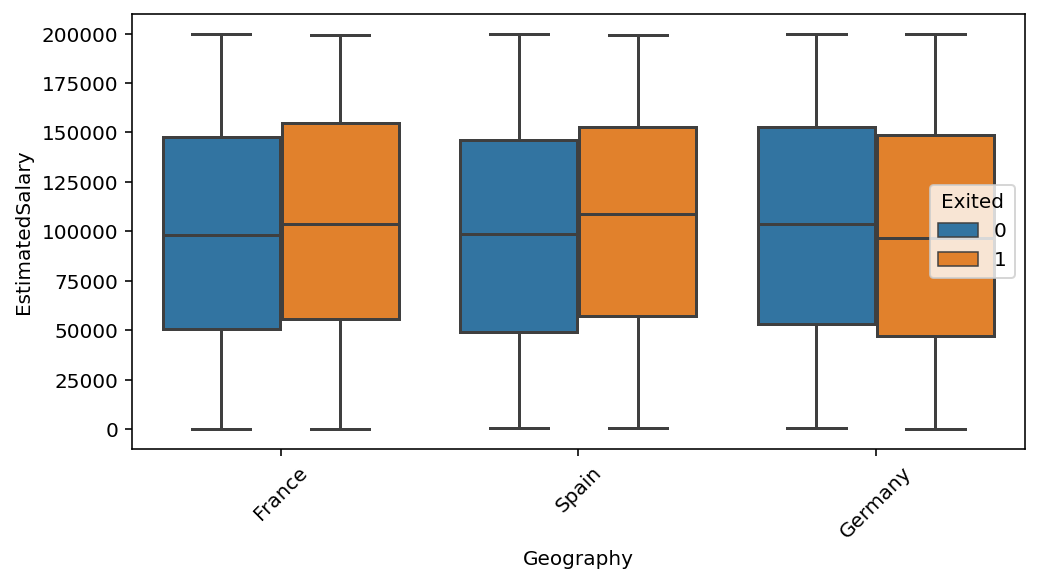

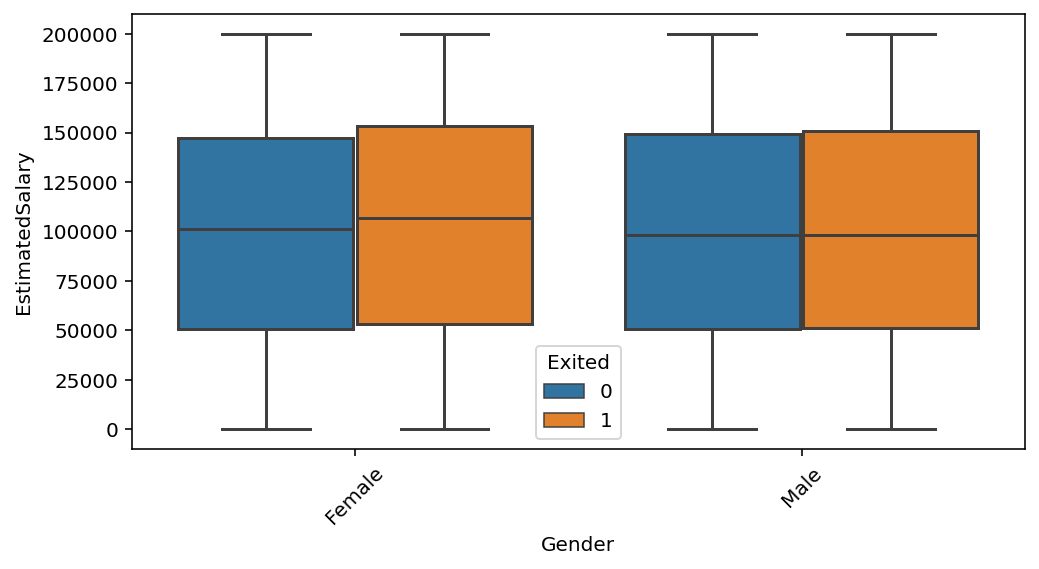

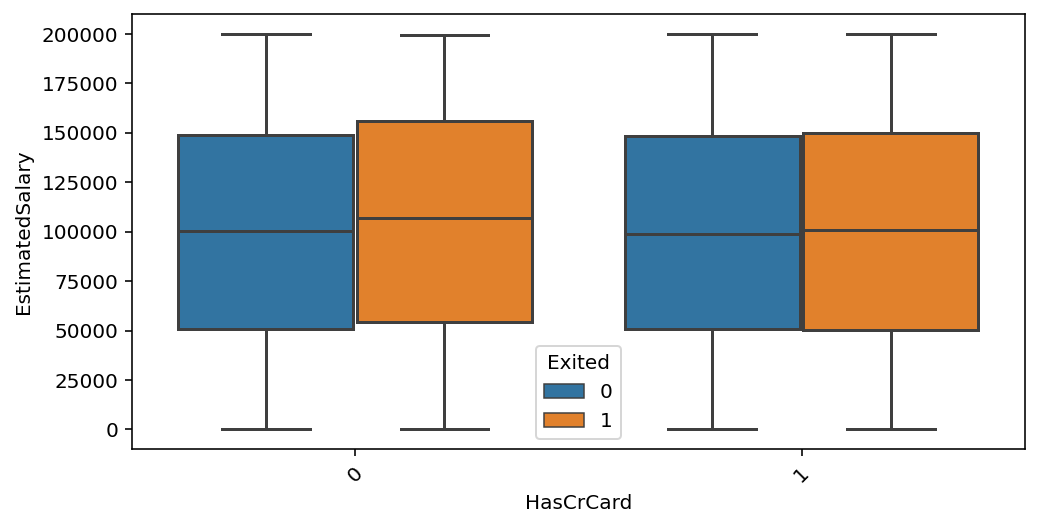

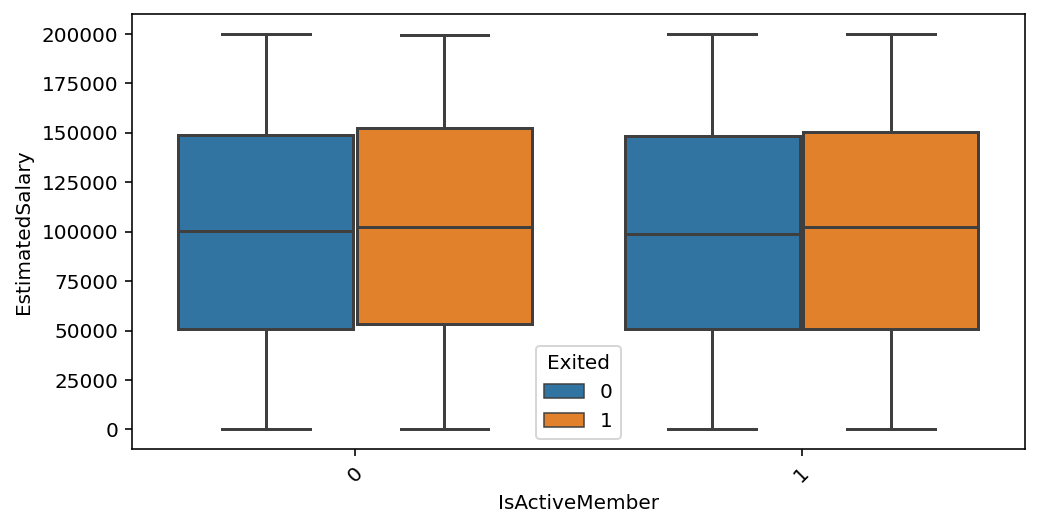

In [23]:
for col_analog in continuous_cols_e:
    for col_digital in category_cols:
        plt.figure(figsize=(8,4))
        sns.boxplot(x=col_digital,y=col_analog, hue="Exited", data=df)
        plt.xticks(rotation=45)
        plt.show()

## (연습) 중요한 변수들에 대해서만 박스플록 그리기
- 의미 있는 연속 변수 3개 ['Age', 'Balance', 'CreditScore']와 카테고리 변수 2개 ['Geography', 'IsActiveMember']에 대해서만 그리시오
- 총 6개의 그래프를 그리시오

In [77]:
# (풀이)



# 전처리

- 고객 이탈을 분류하는 문제이므로 Exited 특성은 target 변수로 사용

In [25]:
y = df['Exited']
df_clean = df.drop(['Exited'], axis=1)

In [26]:
df_clean[:5]

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10

## 범주형 변수 변환
- get_dummies()로 원핫인코딩

In [27]:
df_cat = pd.get_dummies(df_clean, columns=['Geography','Gender'])
df_cat[:5]

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
0               1        101348.88                 1                  0   
1               1        112542.58                 0                  0   
2               0        113931.57                 1                  0   
3               0         93826.63                 1                  0   
4               1         79084.10                 0                  0   

   Geography_Spain  Gender_Female  Gender_Male  
0                0              1            0  
1                1              1            0  
2                0              1            0  
3                0              1            0  
4                1              1            0

## 스케일링
- 연속변수에 대해서 표준 스케일링 수행

In [28]:
# 연속변수명
continuous_cols_e

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [29]:
df_sc = df_cat.copy()
scaler = StandardScaler()
df_sc.loc[:,continuous_cols_e] = scaler.fit_transform(df_sc[continuous_cols_e])
df_sc[:5]

CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0    -0.326221  0.293517 -1.041760 -1.225848      -0.911583          1   
1    -0.440036  0.198164 -1.387538  0.117350      -0.911583          0   
2    -1.536794  0.293517  1.032908  1.333053       2.527057          1   
3     0.501521  0.007457 -1.387538 -1.225848       0.807737          0   
4     2.063884  0.388871 -1.041760  0.785728      -0.911583          1   

   IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
0               1         0.021886                 1                  0   
1               1         0.216534                 0                  0   
2               0         0.240687                 1                  0   
3               0        -0.108918                 1                  0   
4               1        -0.365276                 0                  0   

   Geography_Spain  Gender_Female  Gender_Male  
0                0              1            0  
1                1              1            0  
2                0              1            0  
3                0              1            0  
4                1              1            0

# 분류 모델
- 로지스틱회귀
- 랜덤 포레스트
- LightGBM
- 결정트리

- 훈련/검증 데이터 분리

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df_sc, y)

In [31]:
# 로지스틱회귀
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train) 
model_lr.score(X_test, y_test).round(4)

0.8168

In [32]:
# 랜덤 포레스트
model = RandomForestClassifier()
model.fit(X_train, y_train) 
model.score(X_test, y_test).round(4)

0.87

In [33]:
# LightGBM 부스팅 모델
m_lgbm = LGBMClassifier(max_depth=3)
m_lgbm.fit(X_train, y_train) 
m_lgbm.score(X_test, y_test).round(4)

0.8628

In [34]:
# 분류 결과보기
def show_clf_result(y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [35]:
# 특성중요도 보기
def plot_feature_weight(feature, weight):
    plt.figure(figsize=(8,8))
    W = pd.DataFrame({'feature':feature,'weight':weight})
    W.sort_values('weight', inplace=True)
    plt.barh(W.feature, W.weight)

In [36]:
# 랜덤 포레스트 모델
y_pred = model.predict(X_test)
show_clf_result(y_test, y_pred)

[[1946   75]
 [ 250  229]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2021
           1       0.75      0.48      0.58       479

    accuracy                           0.87      2500
   macro avg       0.82      0.72      0.75      2500
weighted avg       0.86      0.87      0.86      2500



## 오분류 보기

- 0을 1로 오분류 한 경우 보기

In [37]:
index_01 = y_test[y_test < y_pred].index
index_01.size

75

In [38]:
df_cat.loc[index_01][:5]

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
7097          754   50       7  146777.44              2          0   
9880          584   42       3  137479.13              1          1   
6797          693   46       2  104763.41              1          1   
7575          561   49       5   94754.00              1          1   
3589          446   51       4  105056.13              1          0   

      IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
7097               1        150685.52                 0                  0   
9880               0         25669.10                 0                  1   
6797               1         62368.33                 0                  1   
7575               1         26691.31                 0                  1   
3589               0         70613.52                 1                  0   

      Geography_Spain  Gender_Female  Gender_Male  
7097                1              1            0  
9880                0              0            1  
6797                0              0            1  
7575                0              0            1  
3589                0              1            0

## (연습) 1을 0으로 오분류 한 샘플 찾기

In [78]:
# (풀이)



- 특성 중요도

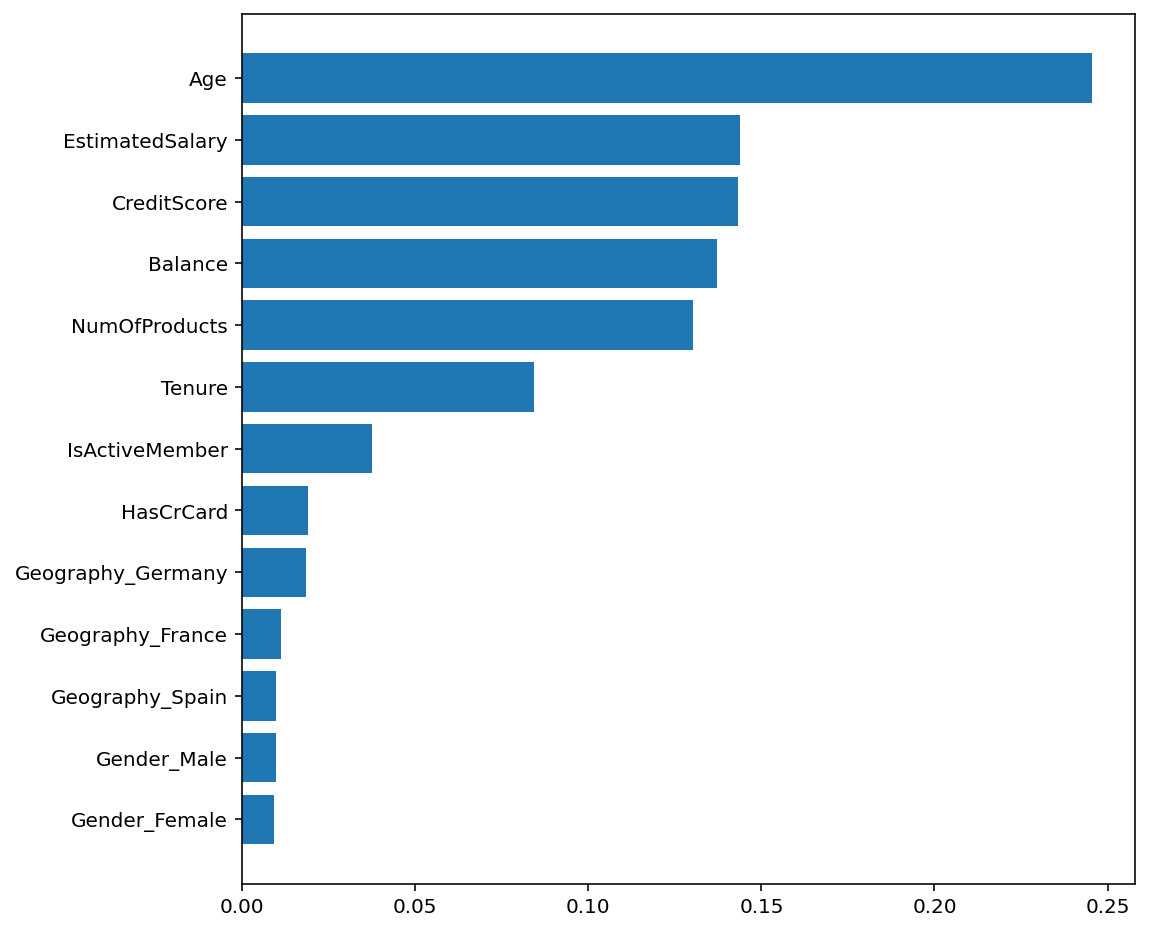

In [41]:
plot_feature_weight(X_test.columns, model.feature_importances_)

## 분류 확률

In [42]:
proba_1 = model.predict_proba(X_test)[:,1].ravel()
proba_1[:5]

array([0.08, 0.07, 0.56, 0.01, 0.01])

## ROC 커브

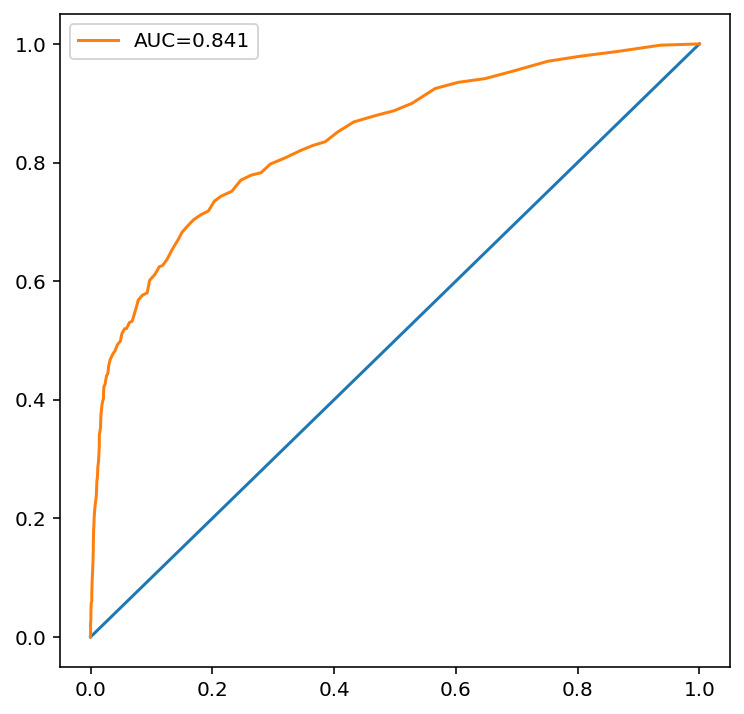

In [43]:
fpr, tpr, _ = roc_curve(y_test.ravel(), proba_1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr, label=f'AUC={roc_auc.round(3)}')
plt.legend()
plt.show()

- 여러가지 분류 확률 경계값을 사용할 때의 리콜,정밀도 보기

## Precision-Recall 선택

In [44]:
proba_1.min(), proba_1.max()

(0.0, 0.96)

In [45]:
proba_range = np.linspace(proba_1.max(), proba_1.min(), 30)
proba_range = proba_range[1:] # 최대값보다 큰 샘플은 없으므로 최대값 삭제
result = []
for prob_thres in list(proba_range):
    y_pred_i = proba_1 > prob_thres
    result.append((prob_thres, precision_score(y_test, y_pred_i), recall_score(y_test, y_pred_i)))

df_r = pd.DataFrame(result, columns=['threshold','precision', 'recall'])
df_r

threshold  precision    recall
0    0.926897   1.000000  0.014614
1    0.893793   0.950000  0.039666
2    0.860690   0.897436  0.073069
3    0.827586   0.887500  0.148225
4    0.794483   0.891089  0.187891
5    0.761379   0.866142  0.229645
6    0.728276   0.849673  0.271399
7    0.695172   0.841808  0.311065
8    0.662069   0.836634  0.352818
9    0.628966   0.817797  0.402923
10   0.595862   0.821138  0.421712
11   0.562759   0.799242  0.440501
12   0.529655   0.775087  0.467641
13   0.496552   0.740385  0.482255
14   0.463448   0.702006  0.511482
15   0.430345   0.663185  0.530271
16   0.397241   0.634434  0.561587
17   0.364138   0.596567  0.580376
18   0.331034   0.567362  0.624217
19   0.297931   0.524510  0.670146
20   0.264828   0.496318  0.703549
21   0.231724   0.461337  0.734864
22   0.198621   0.411700  0.778706
23   0.165517   0.374637  0.807933
24   0.132414   0.339271  0.835073
25   0.099310   0.296788  0.887265
26   0.066207   0.268424  0.935282
27   0.033103   0.234493  0.970772
28   0.000000   0.201688  0.997912

<AxesSubplot:xlabel='threshold'>

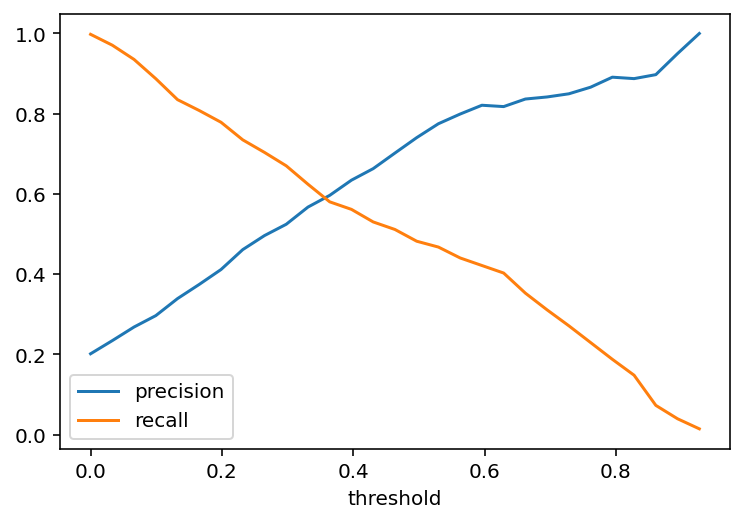

In [46]:
df_r.set_index('threshold').plot()

In [47]:
y_pred_high_recall = proba_1 > 0.05
show_clf_result(y_test, y_pred_high_recall)

[[ 711 1310]
 [  28  451]]
              precision    recall  f1-score   support

           0       0.96      0.35      0.52      2021
           1       0.26      0.94      0.40       479

    accuracy                           0.46      2500
   macro avg       0.61      0.65      0.46      2500
weighted avg       0.83      0.46      0.49      2500



In [48]:
y_pred_high_prec = proba_1 > 0.85
show_clf_result(y_test, y_pred_high_prec)

[[2016    5]
 [ 435   44]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      2021
           1       0.90      0.09      0.17       479

    accuracy                           0.82      2500
   macro avg       0.86      0.54      0.53      2500
weighted avg       0.84      0.82      0.76      2500



## (연습) 리콜이 0.8 이상이 되면서 최대한 정밀도가 높은 모델을 만드시오
- 랜덤 포레스트 모델을 사용하는 경우

In [79]:
# (풀이)



## 결정 트리
- 대표적인 트리를 하나 그려본다 (룰을 찾을 때 유용)
- 시각화를 위해서 스케일링 하지 않은 데이터를 사용한다
 - df_cat 사용

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df_cat, y)
dtc = DecisionTreeClassifier(max_depth=2)
dtc.fit(X_train, y_train) 
dtc.score(X_test, y_test).round(4)

0.8452

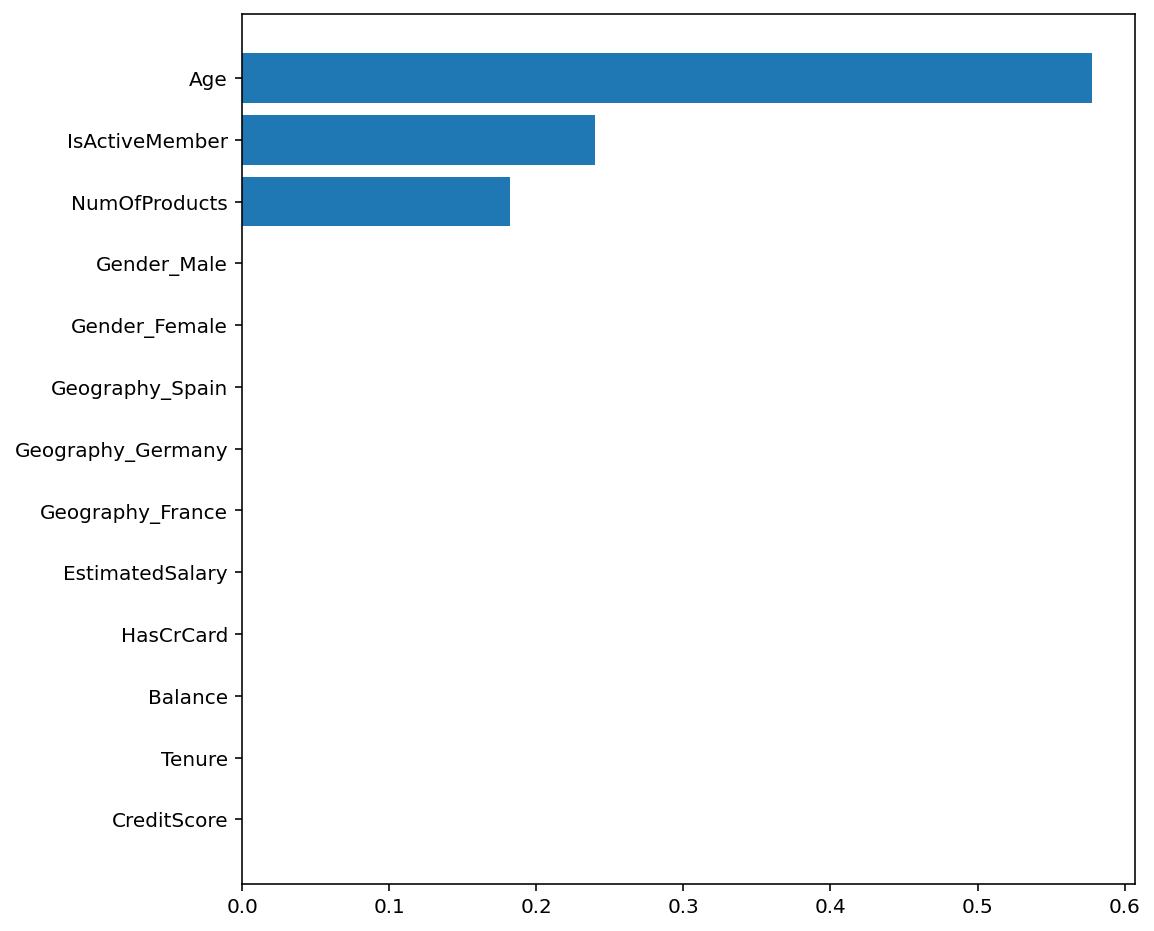

In [51]:
plot_feature_weight(X_test.columns, dtc.feature_importances_)

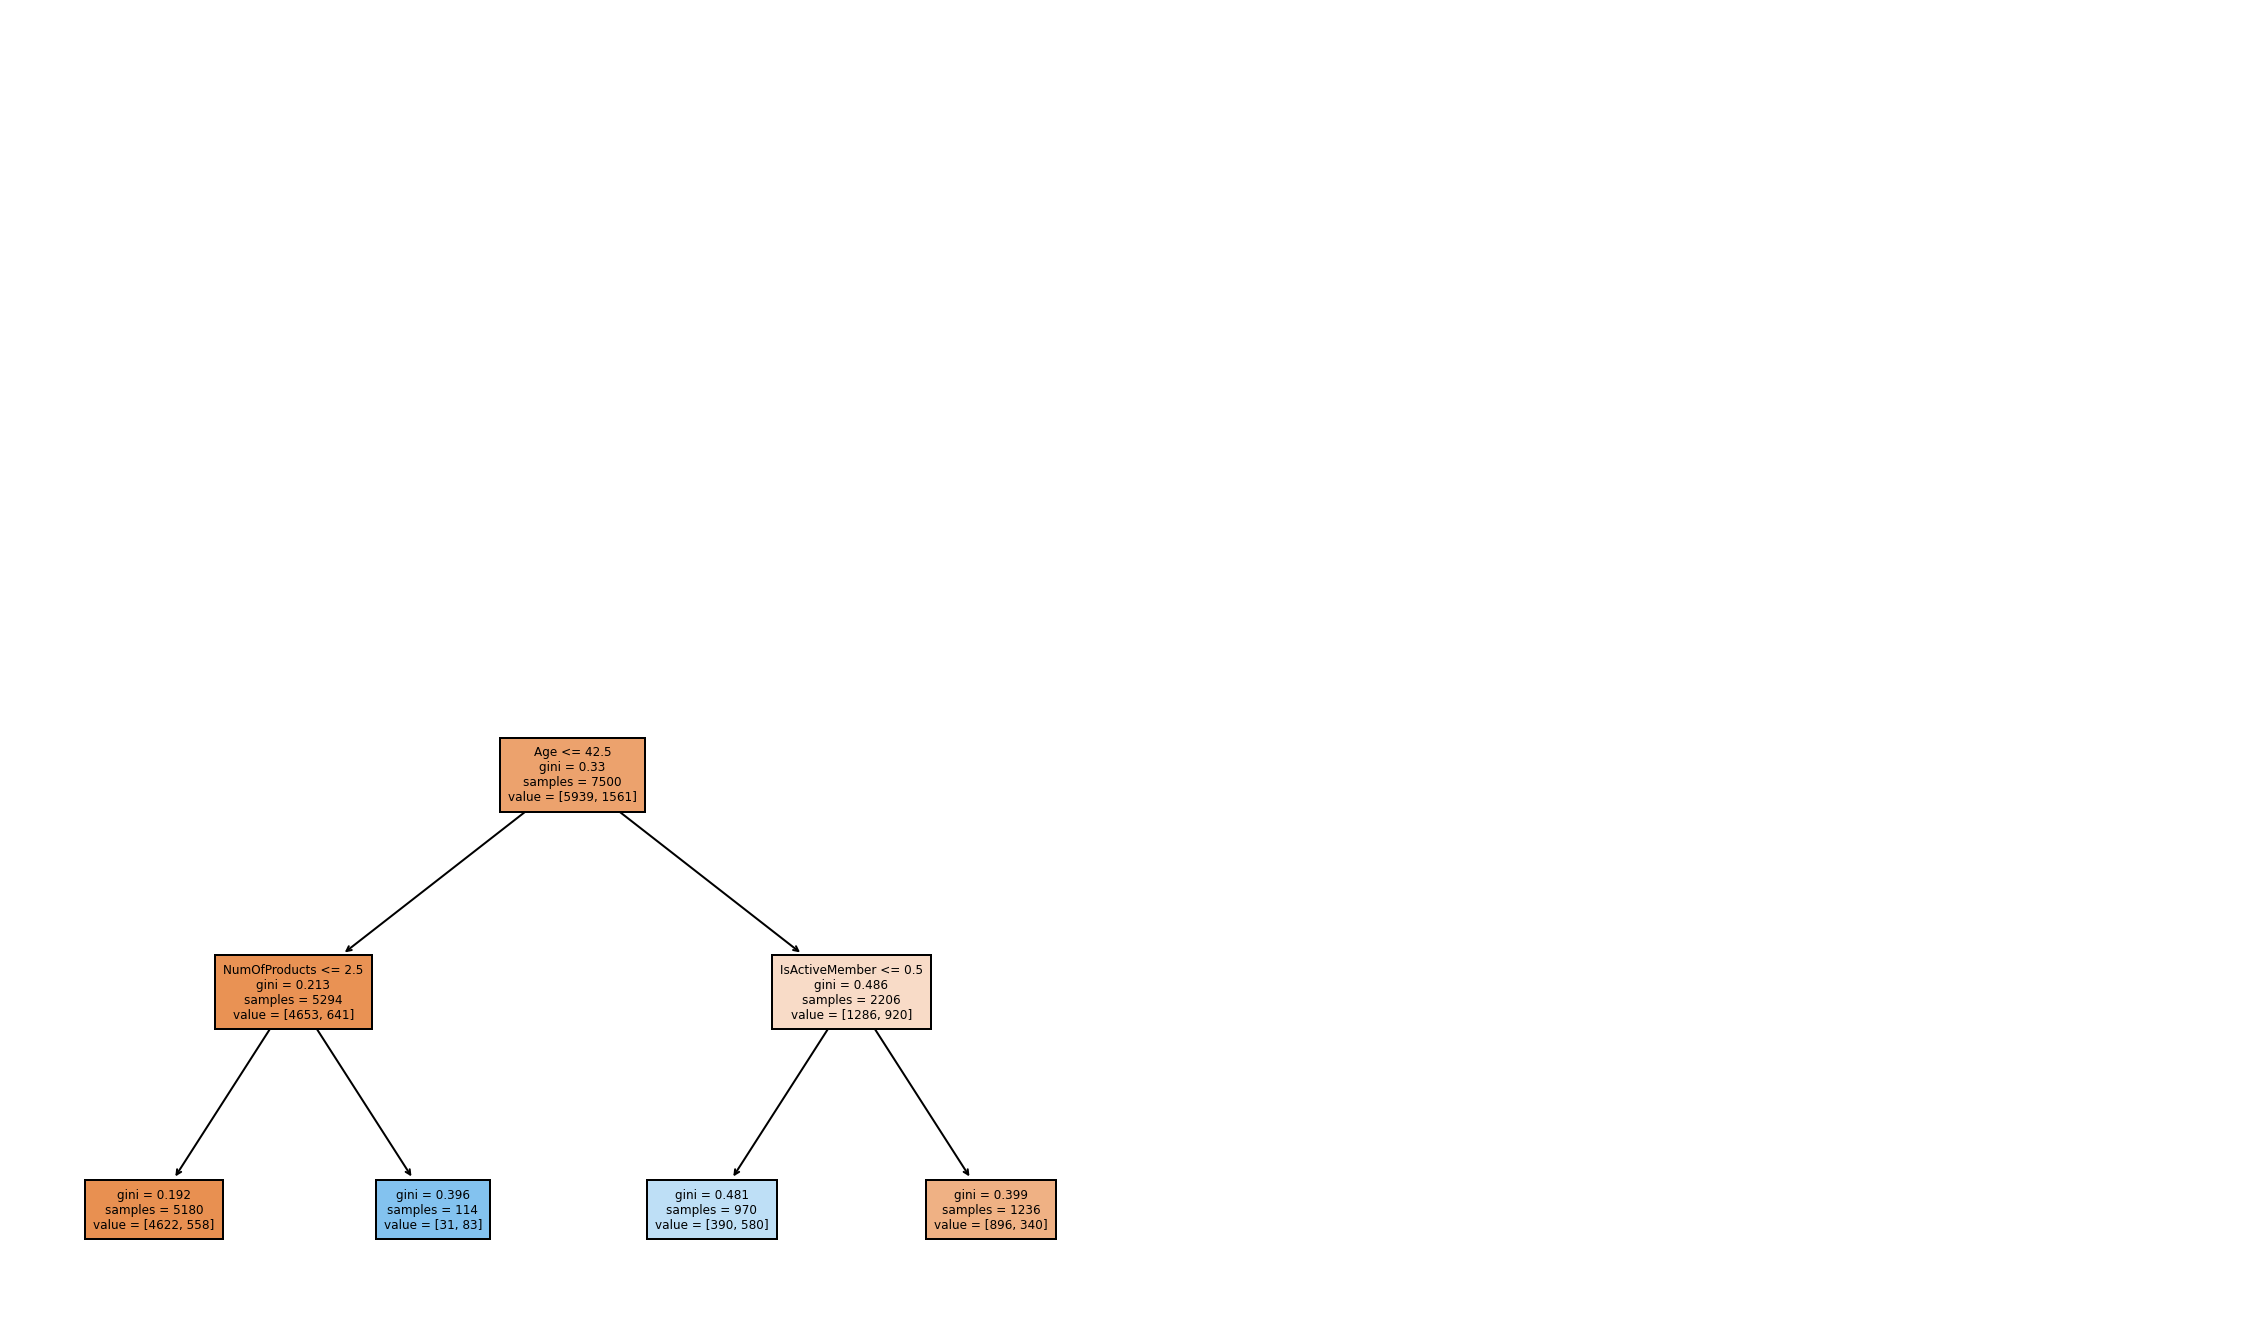

In [52]:
plt.figure(figsize=(20,12))  # set plot size (denoted in inches)
tree.plot_tree(dtc, fontsize=6,
              feature_names=X_test.columns,
              filled=True,
              impurity=True,
              max_depth=3)
plt.show()

## (연습) 결정트리에서 최대 성능이 나오는 max_depth 값을 찾으시오
- 정확도와 f1 점수를 확인한다


In [80]:
# (풀이)



## (연습) 랜덤 포레스트에서 최대 성능이 나오는 max_depth 값을 찾으시오
- 정확도와 f1 점수를 확인한다

In [81]:
# (풀이)



## (연습) 랜덤 포레스트에서 최대 성능이 나오는 max_features 값을 찾으시오

In [82]:
# (풀이)



## 그리드 서치

In [60]:
params = {"max_depth": [5,7,9,10], "max_features":[0.6, 0.7, 0.8]}

# 그리드 서치
clf = GridSearchCV(model, params)
clf.fit(X_train, y_train)
print('최적값 :', clf.best_estimator_)
print('최적 score :', clf.best_score_)

# 최종 평가
score = clf.score(X_test, y_test)
print('최종 평가 =',score)

최적값 : RandomForestClassifier(max_depth=9, max_features=0.6)
최적 score : 0.8589333333333332
최종 평가 = 0.8724


# 정답

## (연습) Exited 로 나누어 카테고리별 총 수를 그리시오

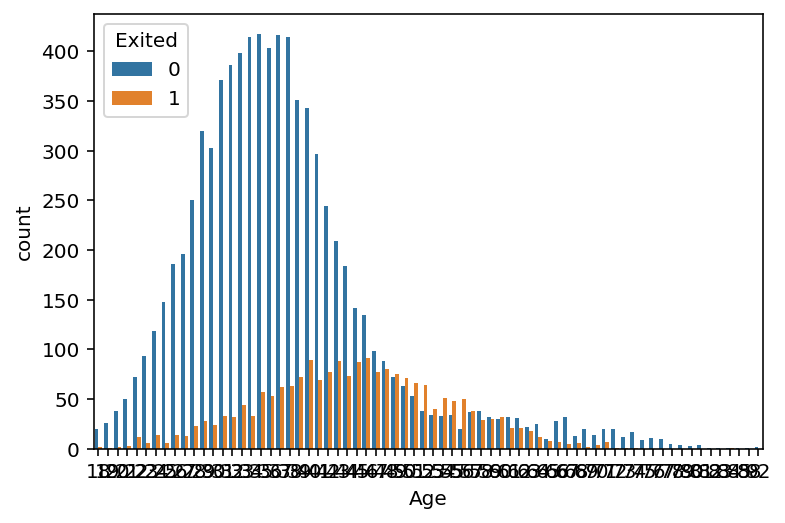

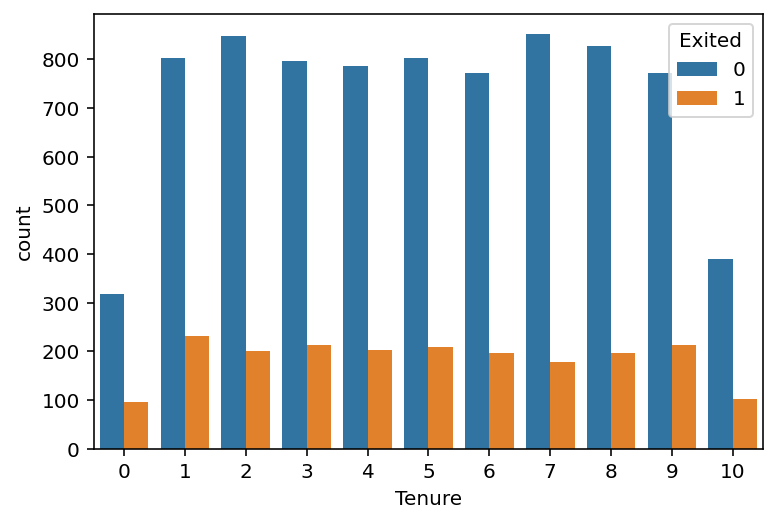

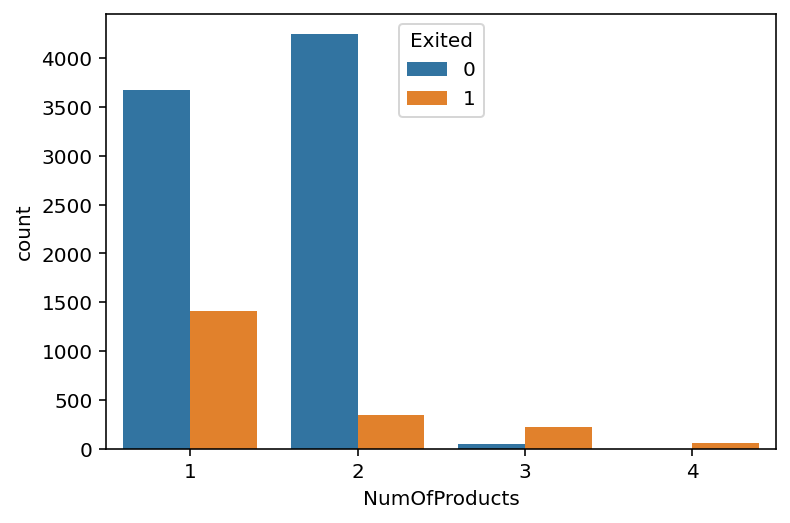

In [61]:
for col in ['Age', "Tenure", 'NumOfProducts']:
    sns.countplot(x=col, data=df, hue='Exited')
    plt.show()

## (연습) 주요 연속 변수간의 산포도 그리기
- 예: 'CreditScore', 'Age', 'Balance','EstimatedSalary' 4개 변수간의 산포도 6개만 그려보시오

In [62]:
col_list_1 = ['CreditScore', 'Age', 'Balance','EstimatedSalary']
scatter_list_1 = list(itertools.combinations(col_list_1, 2))
scatter_list_1

[('CreditScore', 'Age'),
 ('CreditScore', 'Balance'),
 ('CreditScore', 'EstimatedSalary'),
 ('Age', 'Balance'),
 ('Age', 'EstimatedSalary'),
 ('Balance', 'EstimatedSalary')]

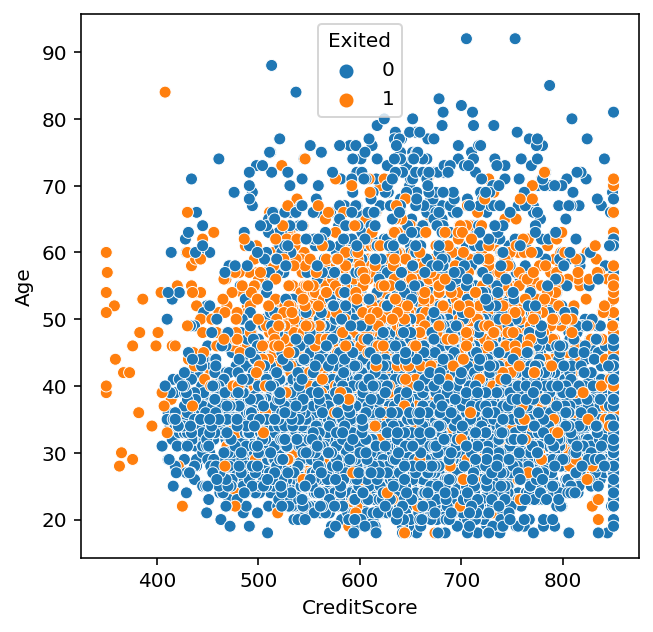

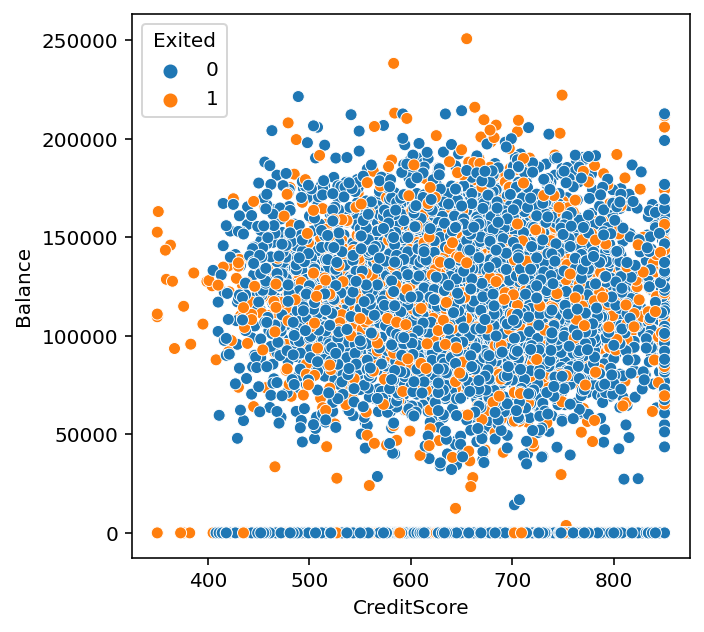

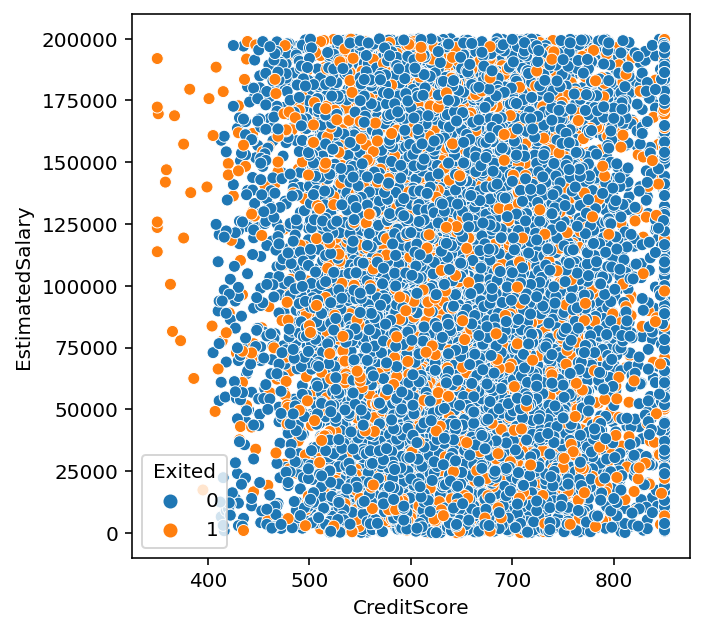

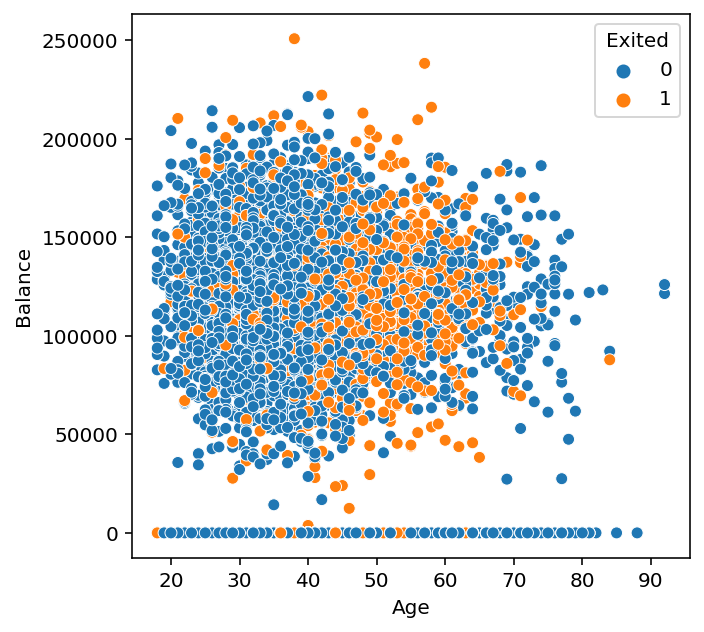

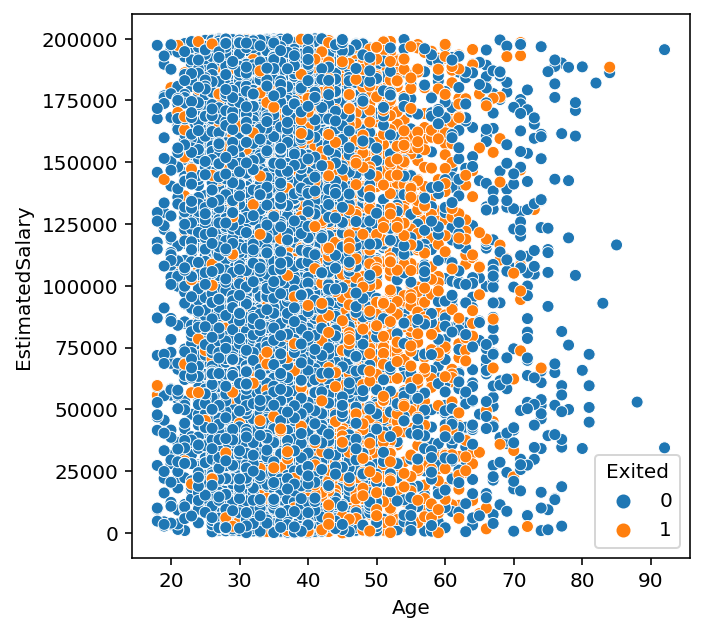

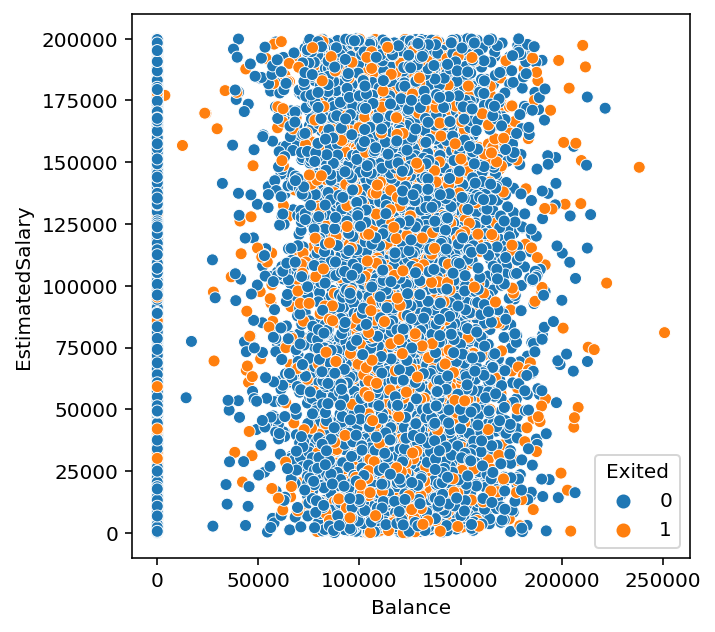

In [63]:
for pair in scatter_list_1:
    plt.figure(figsize=(5,5))
    sns.scatterplot(data=df, x=pair[0],y=pair[1],hue='Exited')
    plt.show()

## (연습) 중요한 변수들에 대해서만 박스플록 그리기
- 의미 있는 연속 변수 3개 ['Age', 'Balance', 'CreditScore']와 카테고리 변수 2개 ['Geography', 'IsActiveMember']에 대해서만 그리시오
- 총 6개의 그래프를 그리시오

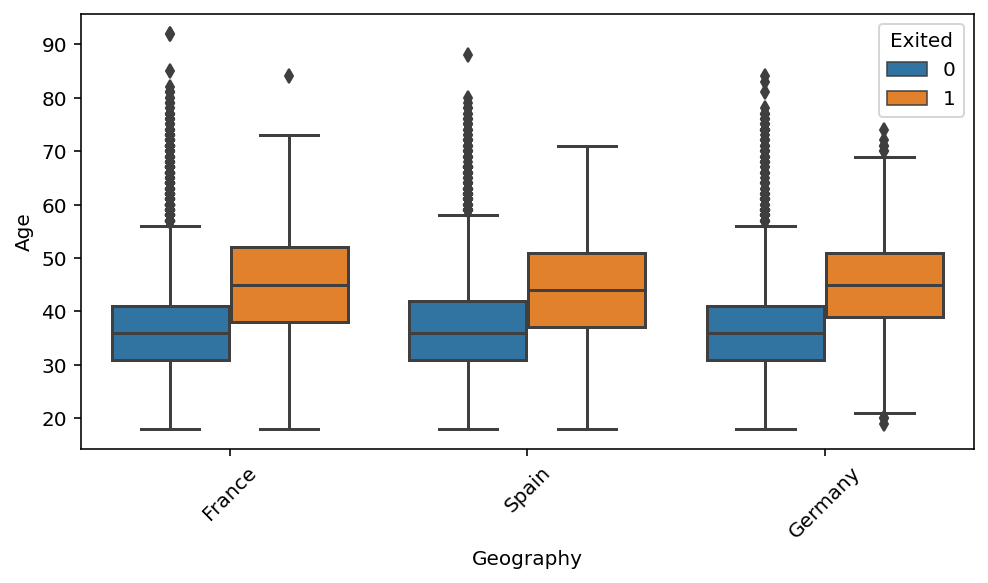

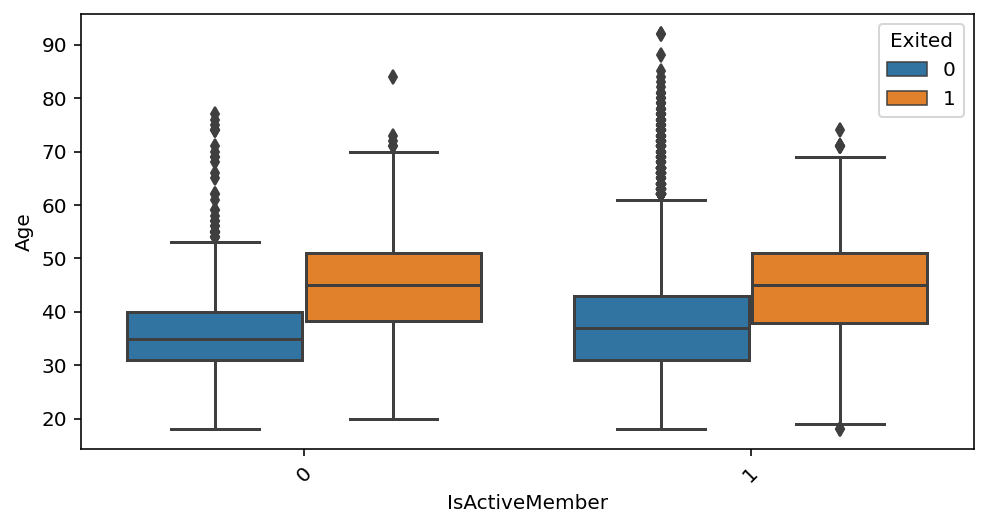

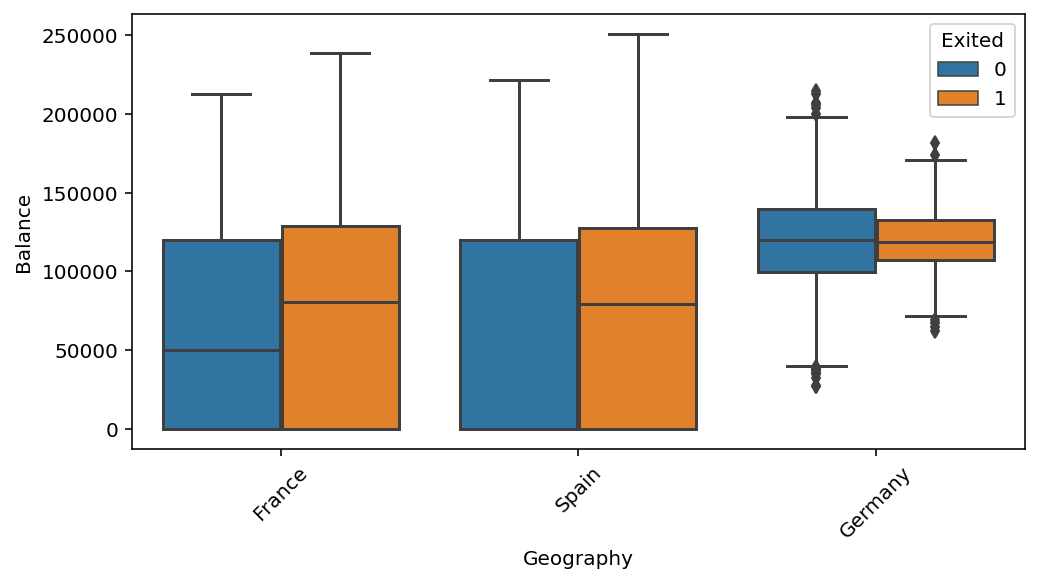

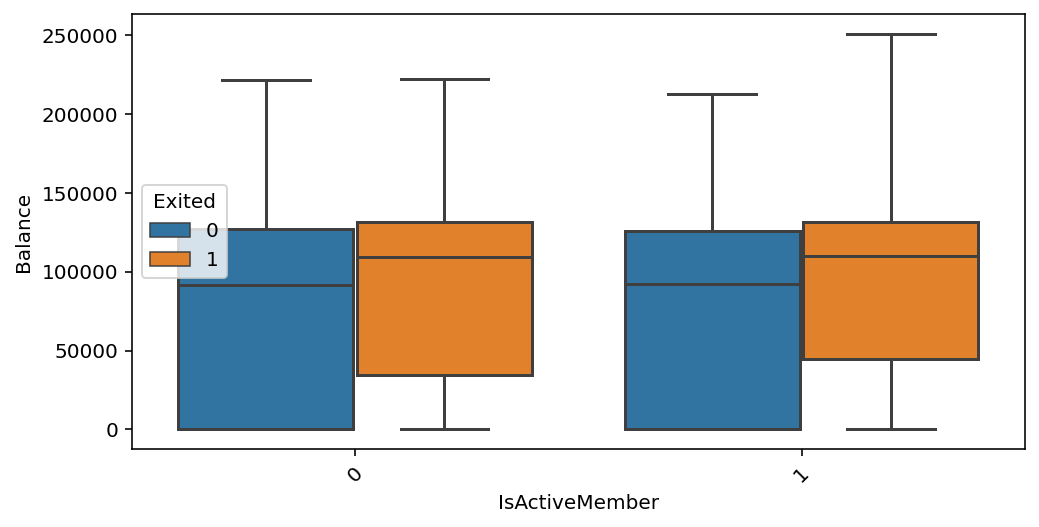

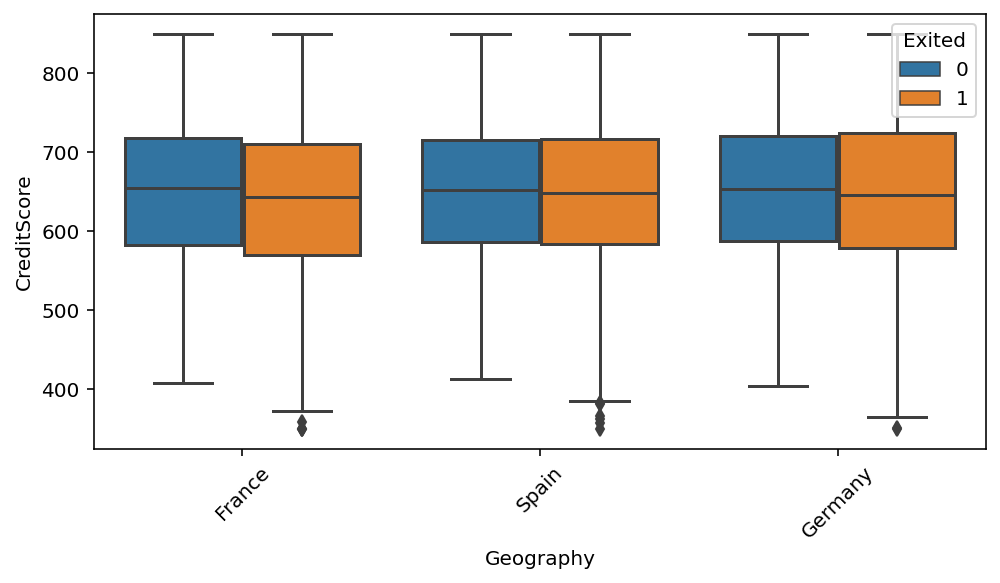

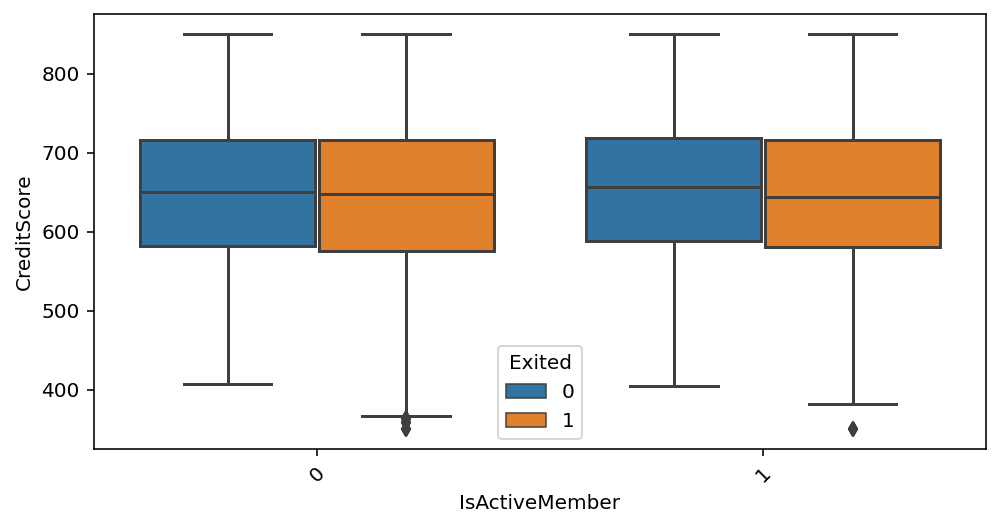

In [64]:
for col_analog in ['Age', 'Balance', 'CreditScore']:
    for col_digital in ['Geography', 'IsActiveMember']:
        plt.figure(figsize=(8,4))
        sns.boxplot(x=col_digital,y=col_analog, hue="Exited", data=df)
        plt.xticks(rotation=45)
        plt.show()

## (연습) 1을 0으로 오분류 한 샘플 찾기

In [65]:
index_10 = y_test[y_test > y_pred].index
index_10.size

235

In [66]:
df_cat.loc[index_10][:5]

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
4939          616   37       5  144235.73              2          0   
9199          544   26       6       0.00              1          1   
3274          629   31       6       0.00              1          1   
5976          537   38      10       0.00              1          0   
936           775   52       8  109922.61              1          1   

      IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
4939               0        154957.66                 1                  0   
9199               0        100200.40                 1                  0   
3274               1         16447.60                 1                  0   
5976               0         52337.97                 1                  0   
936                1         96823.32                 1                  0   

      Geography_Spain  Gender_Female  Gender_Male  
4939                0              0            1  
9199                0              1            0  
3274                0              1            0  
5976                0              1            0  
936                 0              0            1

## (연습) 리콜이 0.8 이상이 되면서 최대한 정밀도가 높은 모델을 만드시오
- 랜덤 포레스트 모델을 사용하는 경우

In [67]:
y_pred_2 = proba_1 > 0.167
show_clf_result(y_test, y_pred_2)

[[1182  842]
 [ 285  191]]
              precision    recall  f1-score   support

           0       0.81      0.58      0.68      2024
           1       0.18      0.40      0.25       476

    accuracy                           0.55      2500
   macro avg       0.50      0.49      0.47      2500
weighted avg       0.69      0.55      0.60      2500



## (연습) 결정트리에서 최대 성능이 나오는 max_depth 값을 찾으시오
- 정확도와 f1 점수를 확인한다


In [68]:
res = []
for i in range(2,21):
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train, y_train) 
    y_pred = dtc.predict(X_test)
    f1 = f1_score(y_test, y_pred).round(3)
    res.append((i, dtc.score(X_test, y_test).round(3), f1))

<AxesSubplot:xlabel='n'>

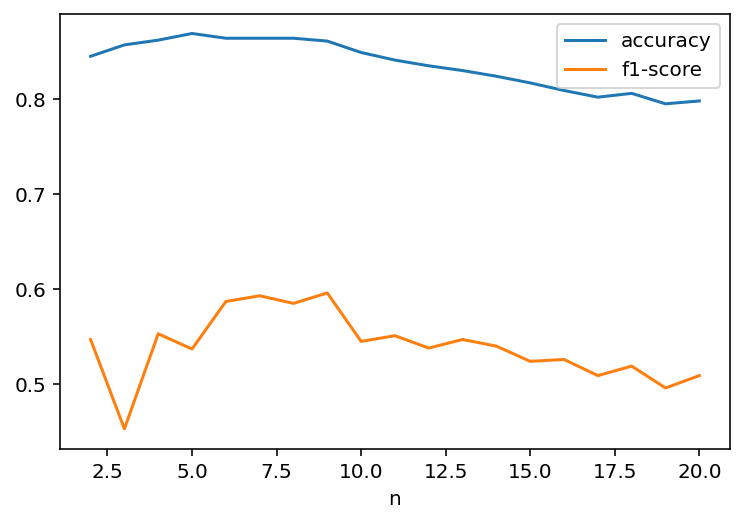

In [69]:
pd.DataFrame(res, columns=['n','accuracy','f1-score']).set_index('n').plot()

In [70]:
dtc = DecisionTreeClassifier(max_depth=7)
dtc.fit(X_train, y_train)
print('accuracy','f1-score')

dtc.score(X_test, y_test).round(3), f1_score(y_test, y_pred).round(3)

accuracy f1-score


(0.864, 0.509)

## (연습) 랜덤 포레스트에서 최대 성능이 나오는 max_depth 값을 찾으시오
- 정확도와 f1 점수를 확인한다

In [1]:
res = []
for i in range(2,21):
    rfc = RandomForestClassifier(max_depth=i)
    rfc.fit(X_train, y_train) 
    y_pred = rfc.predict(X_test)
    f1 = f1_score(y_test, y_pred).round(3)
    res.append((i, rfc.score(X_test, y_test).round(3), f1))

NameError: name 'RandomForestClassifier' is not defined

<AxesSubplot:xlabel='n'>

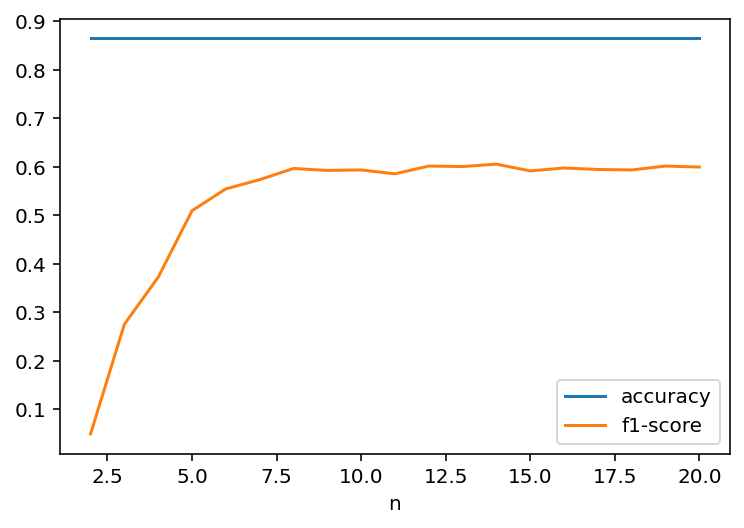

In [72]:
pd.DataFrame(res, columns=['n','accuracy','f1-score']).set_index('n').plot()

In [73]:
rfc =RandomForestClassifier(max_depth=7)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
rfc.score(X_test, y_test).round(3), f1_score(y_test, y_pred).round(3)

(0.875, 0.574)

## (연습) 랜덤 포레스트에서 최대 성능이 나오는 max_features 값을 찾으시오

In [74]:
for f in np.arange(0.1,0.99,0.1):
    rfc =RandomForestClassifier(max_depth=7, max_features=f)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    print(rfc.score(X_test, y_test).round(3), f1_score(y_test, y_pred).round(3))

0.84 0.295
0.859 0.442
0.871 0.561
0.876 0.597
0.876 0.599
0.876 0.602
0.876 0.606
0.874 0.605
0.876 0.611
